In [1]:
import pandas as pd 
from pickle import load
import matplotlib.pyplot as plt
from fonctions import * 
%matplotlib inline
dfCarac = formatage_table_carac(
    "20230225_table_caracteristiques.csv",
    "20221009_table_joursFeriesMetropole.csv",
    "pop_commune.csv",
)
dfLieux =  formatage_table_lieux("20230225_table_lieux.csv")
dfUsagers = formatage_table_usagers("20230225_table_usagers.csv", dfCarac)
dfVehicules = formatage_table_vehicules("20230225_table_vehicules.csv")

with open("20230225_table_dfPoolMLCCA.csv", "rb") as f :
    dfPool = load(f)


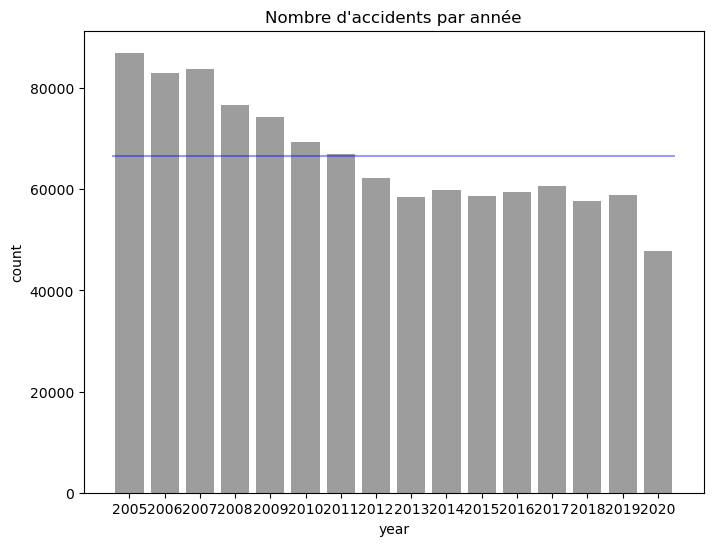

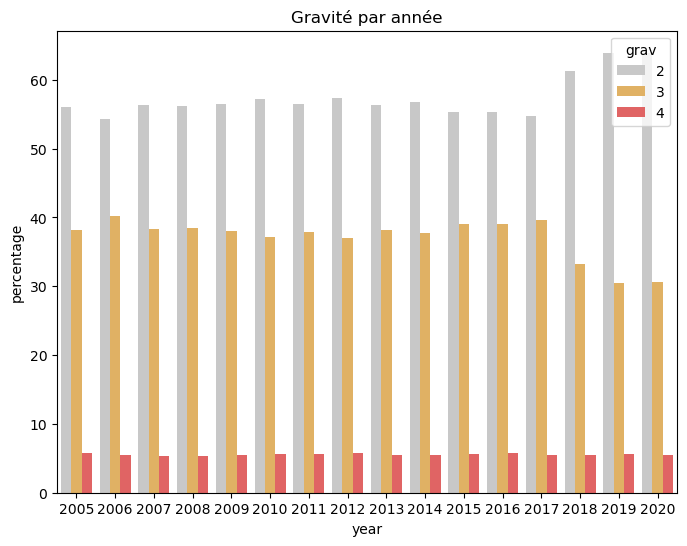

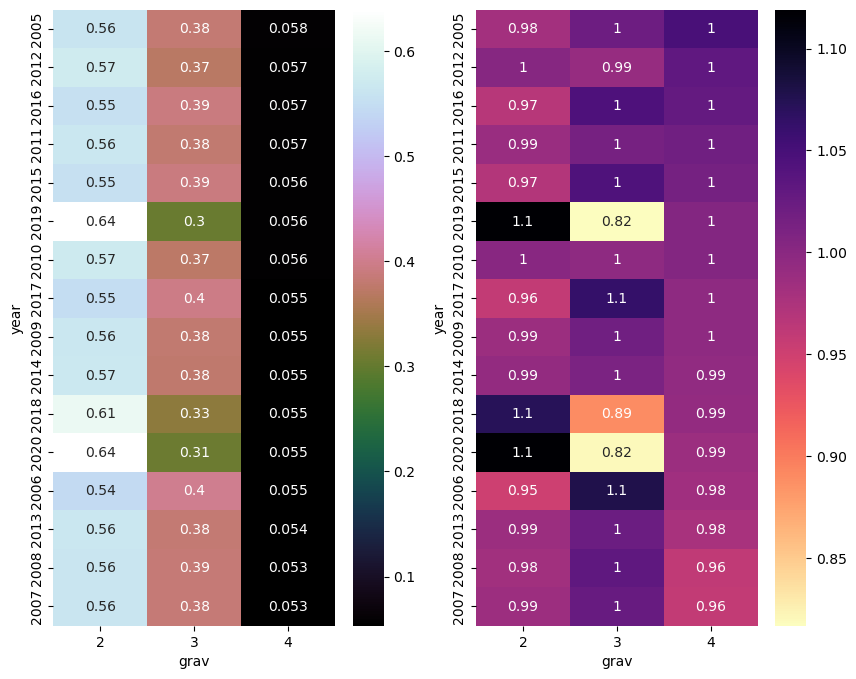

In [2]:
# Travail exploratoire sur l'année

countplot_base(dfCarac, 'year', "Nombre d'accidents par année", ['#9D9D9D'])
# It seems that the number of accident never stops decreasing year after year
# The observable large decreases seem to be during 2007-2008, 2011-2012 and 2019-2020
# The number of accident seemed to be stable between 2013 and 2019

barplot_variable(dfCarac, 'year', 'grav', "Gravité par année")
# It seems that the gravity is less important during 2018 to 2020
heatmap_crosstable(dfCarac, 'year', 'grav', "")
# Even though 2018 to 2020 have the largest proportions of accident gravity 3, they also have the lowest gravity 3 ones
# It seems that the state has focused on reducing the overall number of accident but not the gravity of accidents

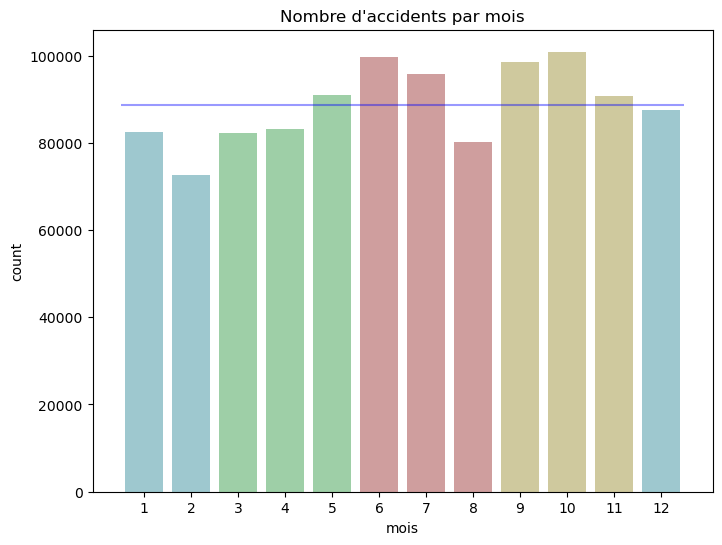

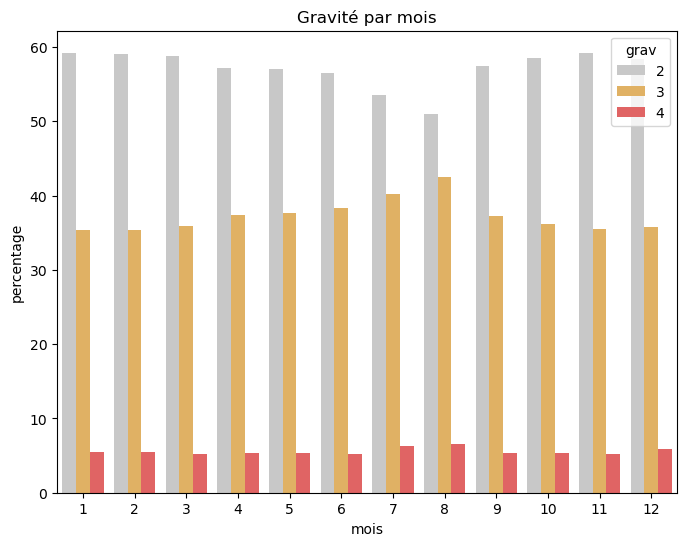

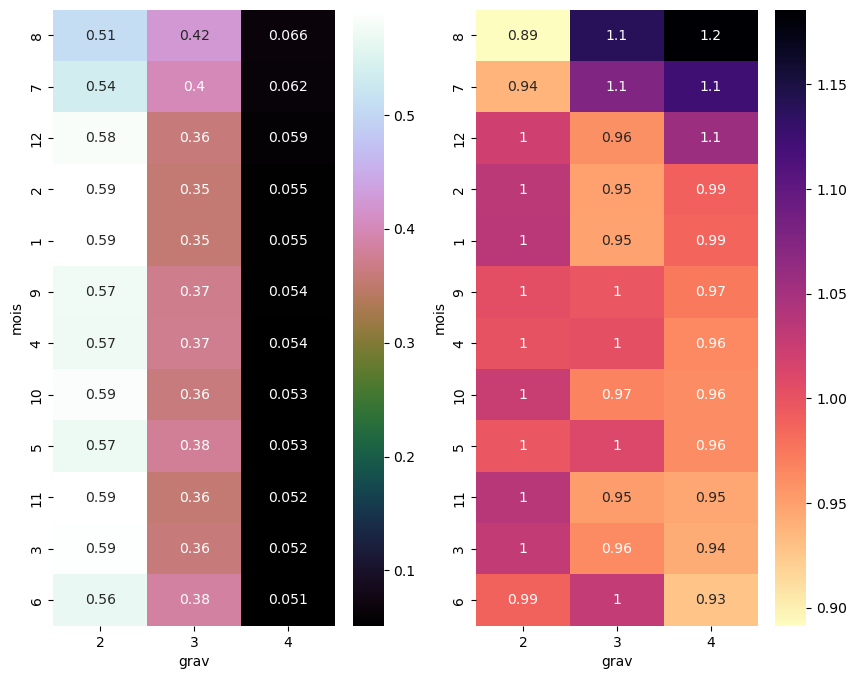

In [3]:
# Travail exploratoire sur le mois

table = dfCarac
variable = "mois"

countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#96CED7', '#96CED7', 
                   '#96D7A2', '#96D7A2', '#96D7A2', 
                   '#D79696', '#D79696', '#D79696', 
                   '#D7CF96', '#D7CF96', '#D7CF96', 
                   '#96CED7'])
# On peut observer que les mois de juin, juillet, septembre et octobre semblent avoir le plus d'accidents
# On peut observer que le mois de février compte le moins d'accidents mais il comporte aussi 28 jours

barplot_variable(table, variable, 'grav', "Gravité par " + variable)
# It seems that the gravity of accident is larger during the weekend compared to the week
heatmap_crosstable(table, variable, 'grav', "")
# It seems that the largest proportion of accident gravity 2 & 3 happen during august and july

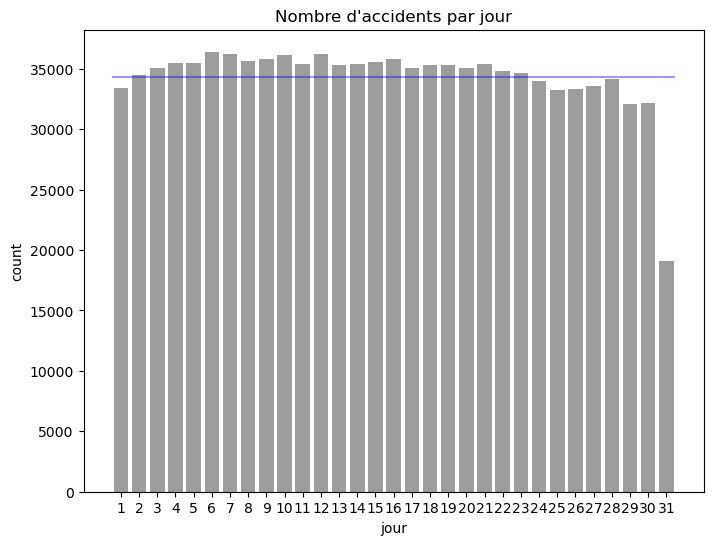

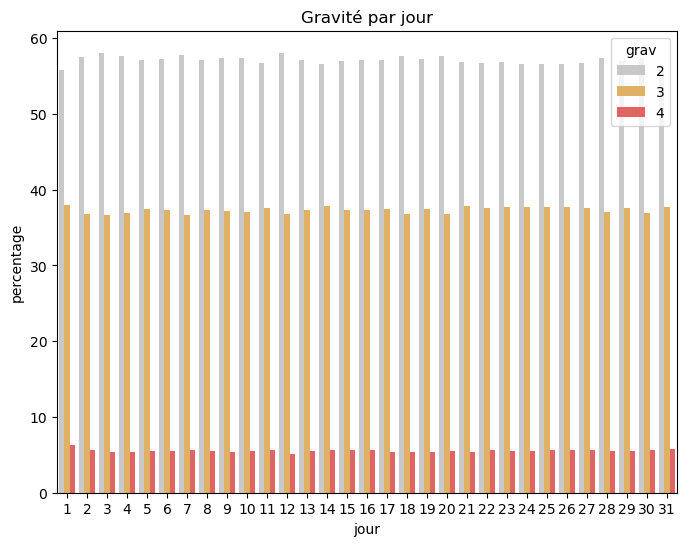

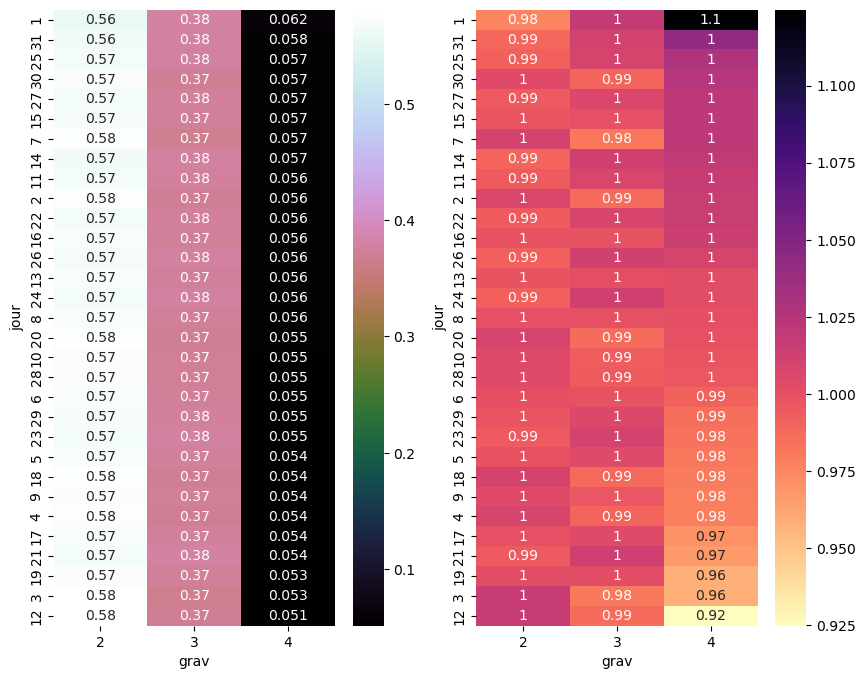

In [4]:
# Travail exploratoire sur le jour du mois

table = dfCarac
variable = "jour"

countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#9D9D9D'])
# With no surprise, day 31 has twice as less accidents as other days of the month because it only occurs 1 months out of 2

barplot_variable(table, variable, 'grav', "Gravité par " + variable)
# Hard to read this figure but no trend seems to be seen
heatmap_crosstable(table, variable, 'grav', "")
# Geniunly no trend drawn

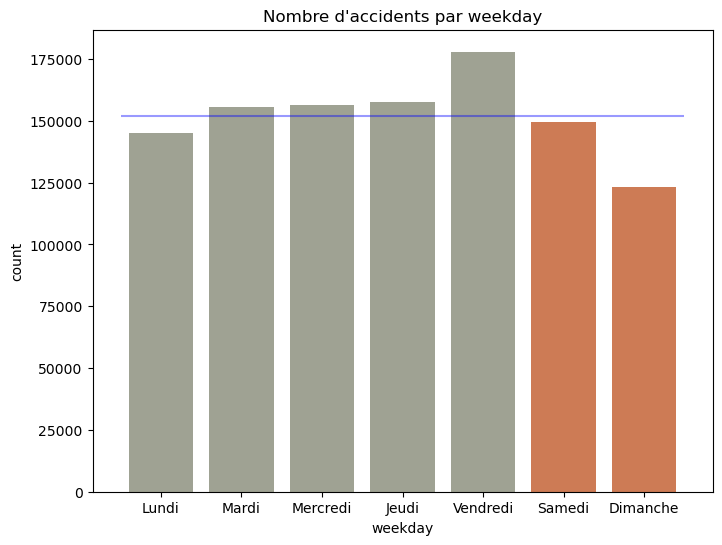

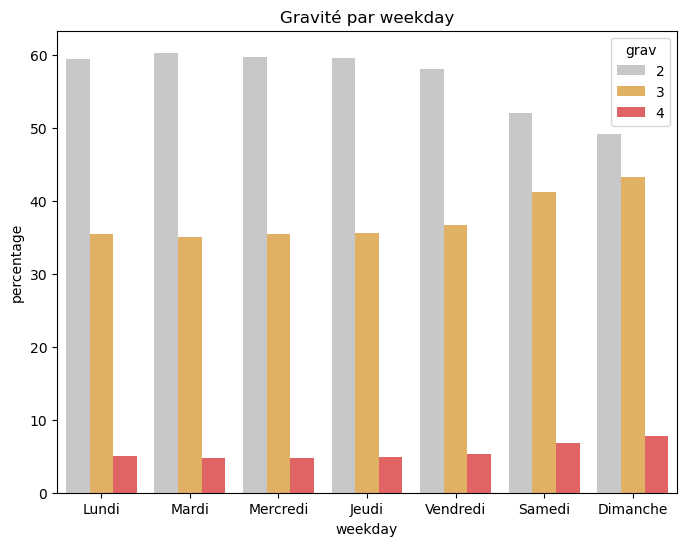

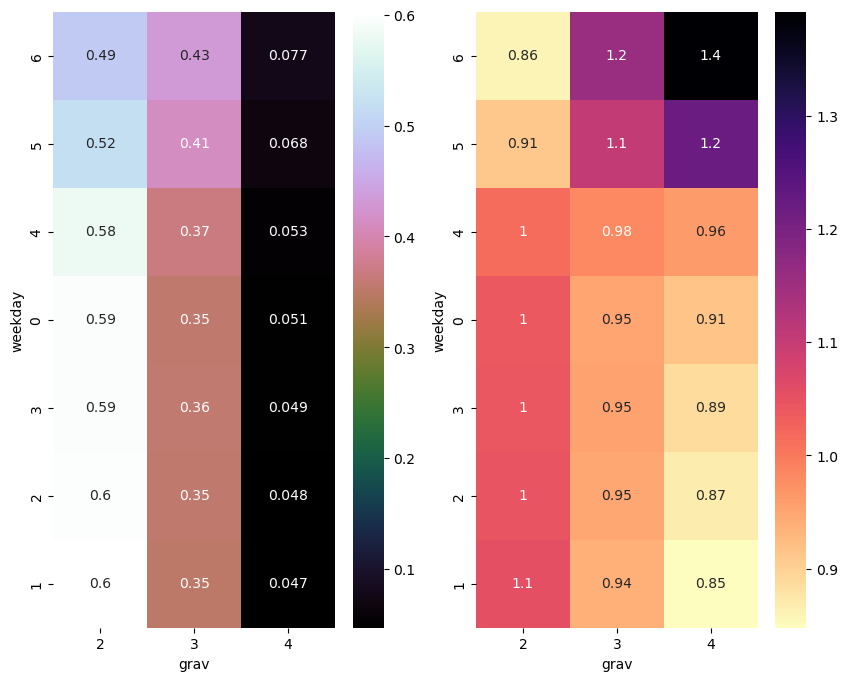

In [5]:
# Travail exploratoire sur le jour de la semaine

table = dfCarac
variable = "weekday"
xticks = np.arange(7)
label_xticks = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#A0A491', '#A0A491', '#A0A491', '#A0A491', '#A0A491', '#E17441', '#E17441'],
               xticks, label_xticks)
# It seems that the friday is the accident day
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# It seems that the gravity of accident is larger during the weekend compared to the week
heatmap_crosstable(table, variable, 'grav', "")
# Actually, the largest proportion of accident gravity 2 is during sunday then saturday

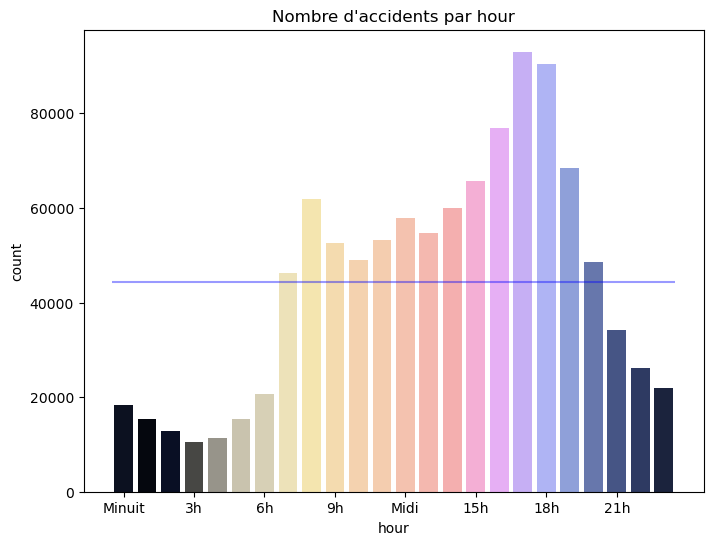

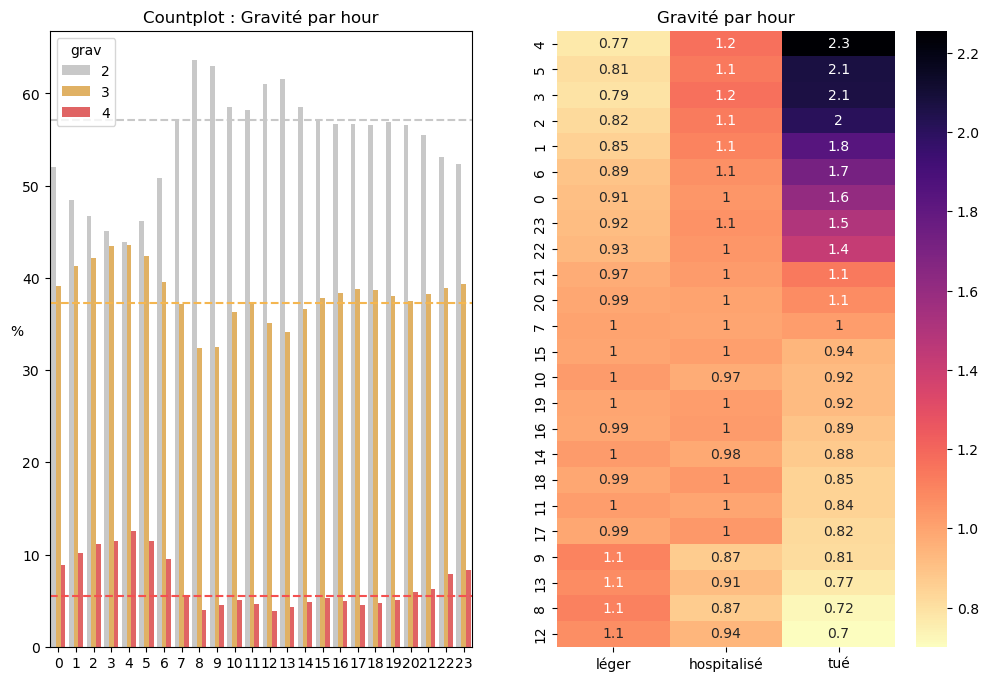

In [6]:
# Travail exploratoire sur l'heure de la journée

table = dfCarac
variable = "hour"
xticks = [0, 3, 6, 9, 12, 15, 18, 21]
label_xticks = ['Minuit', '3h', '6h', '9h', 'Midi', '15h', '18h', '21h']

countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#090F23', '#03060F', '#040D29', '#484743', '#999588', '#CDC5A9', 
                     '#DDD3B0', '#F5E7B1', '#FFECA4', '#FFDEA4', '#FFD2A4', '#FFCBA4', 
                     '#FFBDA4', '#FFAFA4', '#FFA4A4', '#FFA4D6', '#EDA4FF', '#C2A4FF', 
                     '#A4AAFF', '#839AE5', '#5B71B8', '#3C508F', '#26366A', '#152043'],
               xticks, label_xticks)

# It seems that most accident happen between 4pm and 7pm which is when people usually go back home and the sun goes down
# At 7am, the number of accident drastically increase and really goes down after 8pm
# Wow, it seems that the gravity of accidents is worst during the night (22pm-6am)
# More than 5% gravity 2 during the night against less than 4% during full day
barplot_heatmap_associated(
    table,
    variable,
    "grav",
    "Countplot : Gravité par " + variable,
    "Gravité par " + variable,
    xticks_labels_cntplot=label_xticks,
    xticks_labels_heatmap=['léger', 'hospitalisé', 'tué'])
# Proposition: creating a full night variable [0-6am] (yes/no)

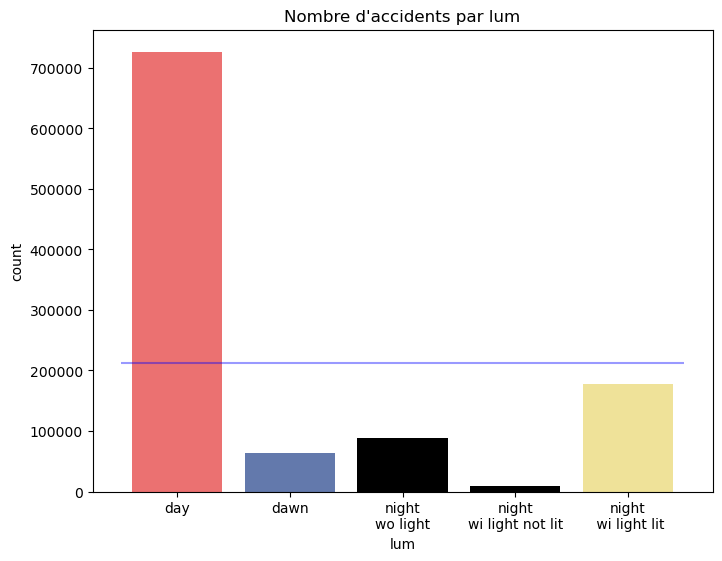

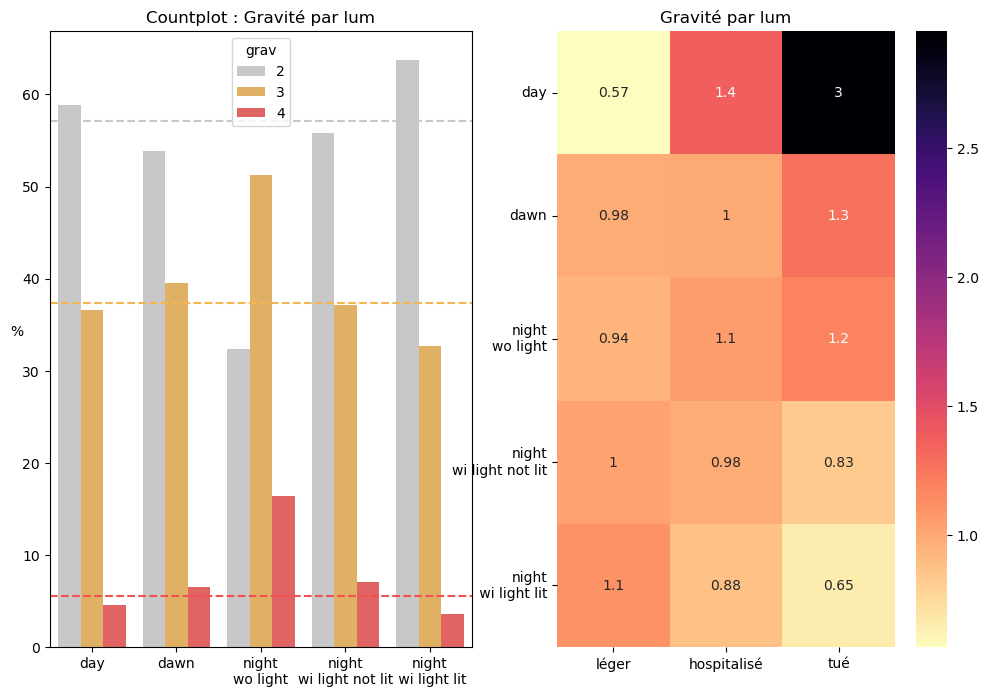

In [7]:
# Travail exploratoire sur la luminosité

table = dfCarac[~dfCarac['lum'].isna()]
variable = "lum"
xticks = np.arange(0,5,1)
label_xticks = ['day', 'dawn', 'night\nwo light', 'night\nwi light not lit', 'night\n wi light lit']

countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#FF5D5D', '#5774B8', '#000000', '#000000', '#FDEC8B'],
               xticks, label_xticks)

# It seems that most accident happen during the full day
barplot_heatmap_associated(
    table,
    variable,
    "grav",
    "Countplot : Gravité par " + variable,
    "Gravité par " + variable,
    xticks_labels_cntplot=label_xticks,
    xticks_labels_heatmap=['léger', 'hospitalisé', 'tué'], 
    x_ticks_label= 1)
# Wow, it seems that the gravity of accidents is worst during the night (22pm-6am)
# More than 5% gravity 2 during the night against less than 4% during full day
# The night without public lightning seems to have a drastic increase of gravity 2 and 3 accidents rate (10% and 44%)!
# Then the two other cases where no much light is on have interesting gravity 2 increase accident rates

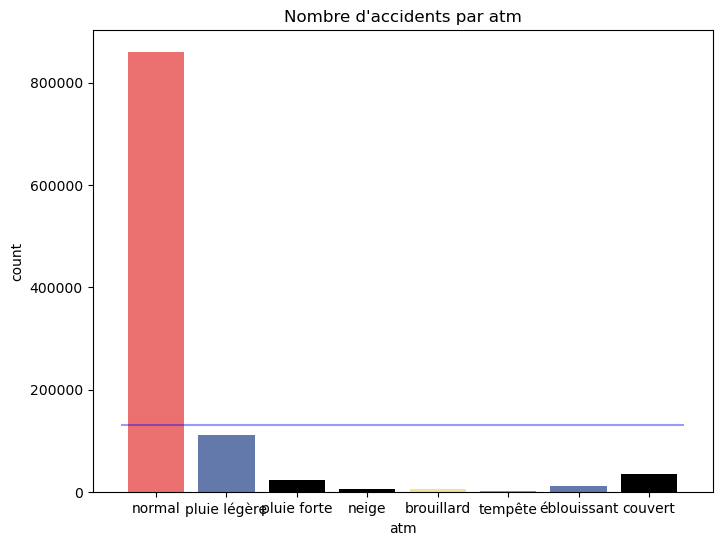

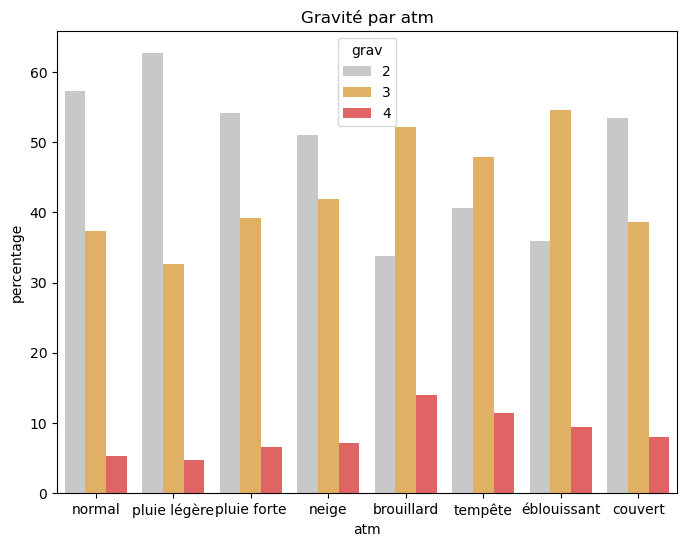

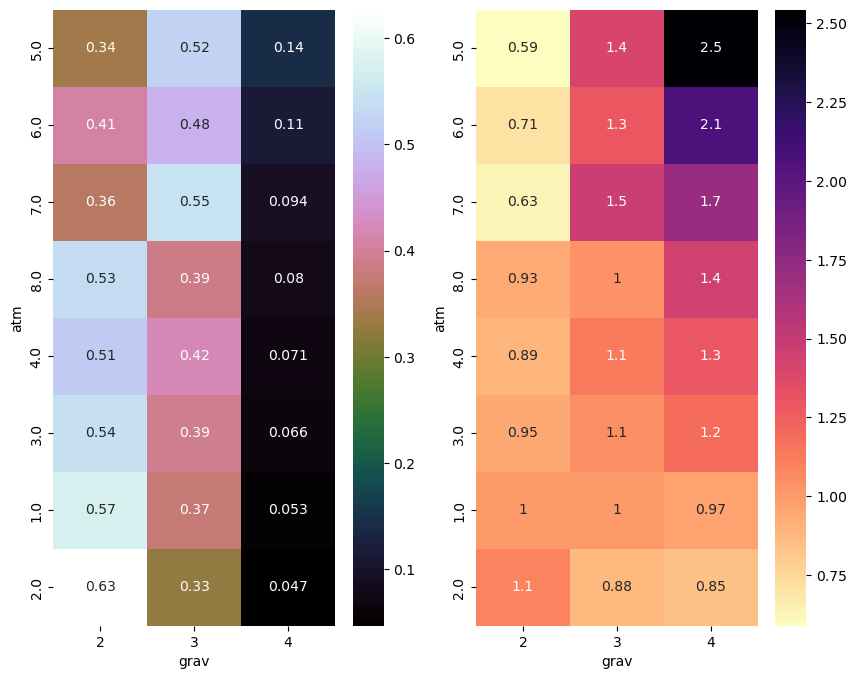

In [8]:
# Travail exploratoire sur les conditions atmosphériques
variable = "atm"
table = dfCarac[~dfCarac[variable].isna()]
label_xticks = ['normal', 'pluie légère', 'pluie forte', 'neige', 'brouillard', "tempête", "éblouissant", "couvert"]
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accidents par " + variable, ['#FF5D5D', '#5774B8', '#000000', '#000000', '#FDEC8B'],
               xticks, label_xticks)
# It seems that most accident happen with normal atmospheric conditions, then light rain
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)

# Wow, it seems that the gravity of accidents is worst during fog/smoke, strong wind/storm, dazzling weather and 'other'

heatmap_crosstable(table, variable, 'grav', "")
# These graphs confirm that both gravity 2 and 3 are increase for groups 5, 6, 7 and 9

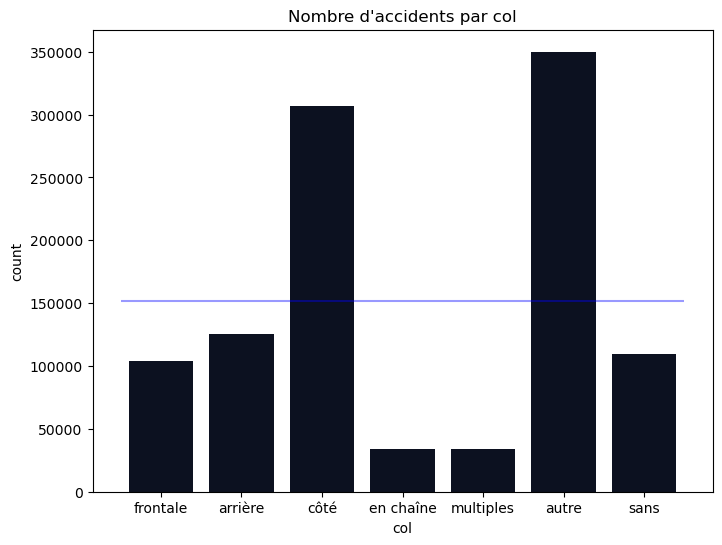

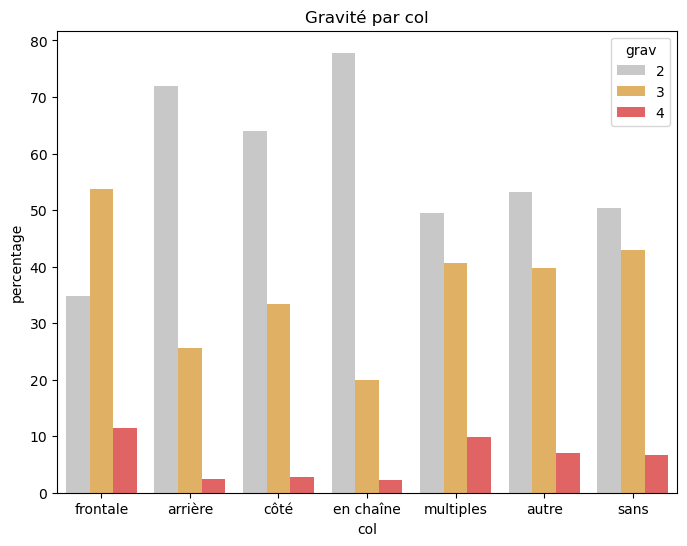

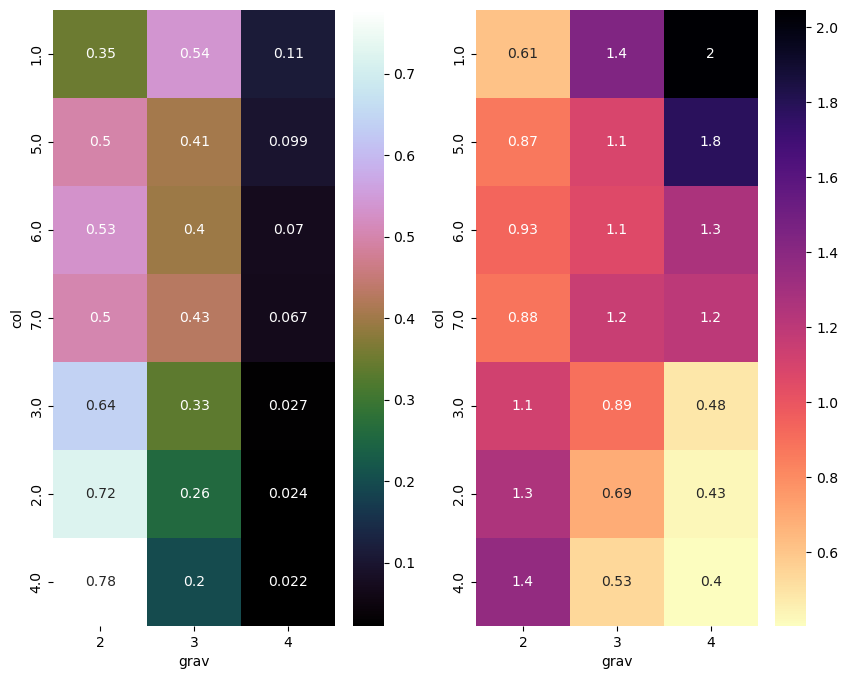

In [9]:
# Travail exploratoire sur les types de collision
variable = "col"
table = dfCarac[~dfCarac[variable].isna()]
label_xticks = ['frontale', 'arrière', 'côté', 'en chaîne', 'multiples', "autre", "sans"]
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accidents par " + variable,['#090F23', '#090F23', '#090F23', '#090F23', '#090F23', '#090F23', '#090F23'],
               xticks, label_xticks)
# Other collision and by the side are the most counted
# It is quite disturbing to see that the most filled class is the group 'other'
# There is a feeling that this variable was not well defined or filled
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)

# Les groupes 2, 3 et 4 sont très peu impactés en termes de gravité alors que les groupes 1, 6 et 7 semblent impactants

heatmap_crosstable(table, variable, 'grav', "")
# La collision de type 1 est celle qui maximise les accidents de gravité 3 avec un fort taux de gravité 2
# Les collisions de type 6 et 7 sont celles qui maximisent les accidents de gravité 2

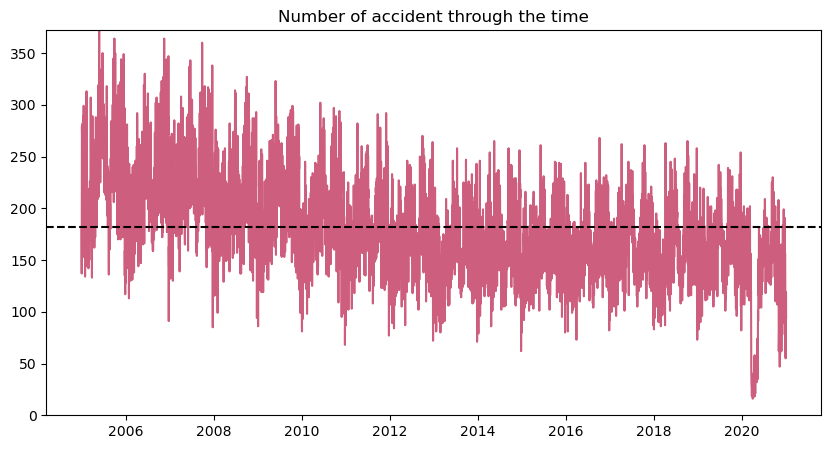

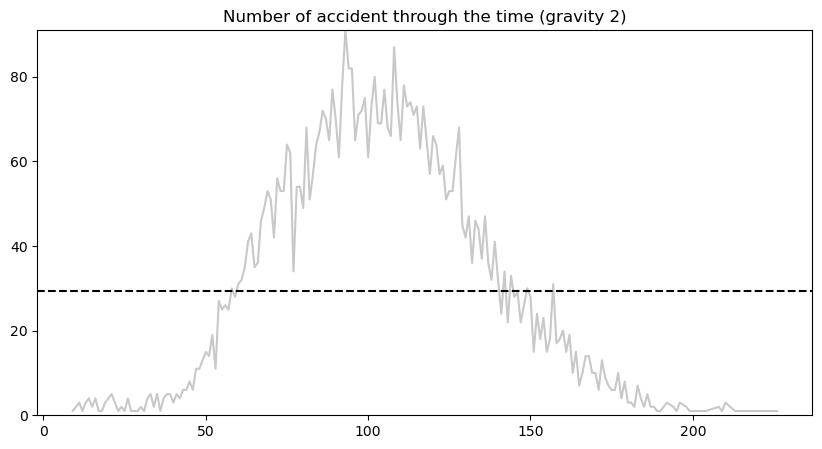

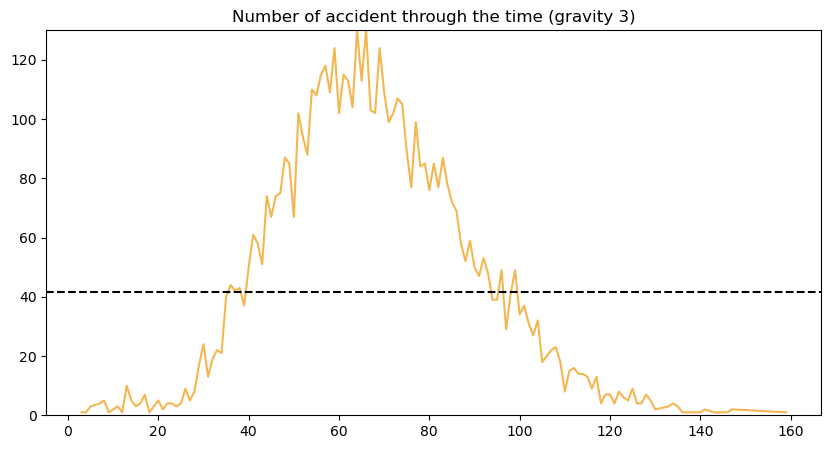

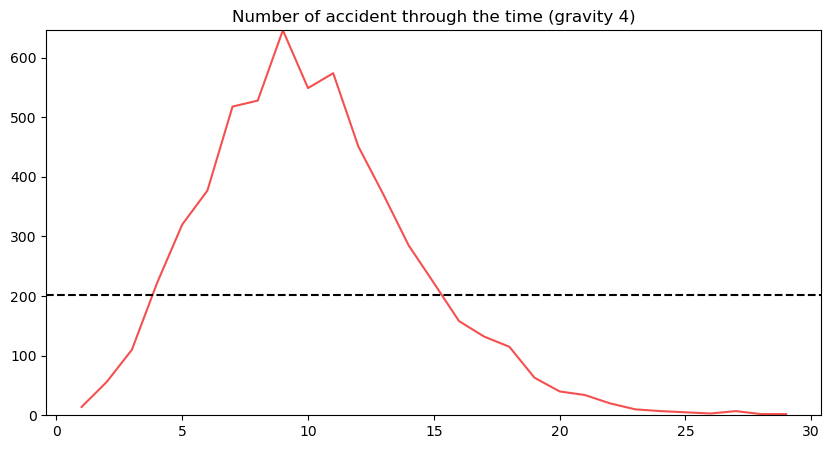

In [10]:
# Travail exploratoire sur les dates
variable = "date"
table = dfCarac[~dfCarac[variable].isna()]

plot_std(table, variable, 'Number of accident through the time', "#CE5E7D")



table2 = dfCarac[(dfCarac.grav==2)][variable].value_counts().sort_index().reset_index()
plot_std(table2, variable, 'Number of accident through the time (gravity 2)', "#C8C8C8")

table3 = dfCarac[(dfCarac.grav==3)][variable].value_counts().sort_index().reset_index()
plot_std(table3, variable, 'Number of accident through the time (gravity 3)', "#F4B650")

table4 = dfCarac[(dfCarac.grav==4)][variable].value_counts().sort_index().reset_index()
plot_std(table4, variable, 'Number of accident through the time (gravity 4)', "#F45050")




In [11]:
# Initiating folds
dfCaracDate = dfCarac[dfCarac['date'] > datetime(2000,1,1)]
dfDateGrav = pd.crosstab(dfCaracDate['date'], dfCaracDate['grav'], normalize=0).sort_values(by=4, ascending=False)

dfDateGravLambda = dfDateGrav.apply(lambda x: x/dfCaracDate['grav'].value_counts(normalize=True), axis=1)
dfDateGravLambdaGrav2 = dfDateGravLambda[2].sort_index()
dfDateGravLambdaGrav3 = dfDateGravLambda[3].sort_index()
dfDateGravLambdaGrav4 = dfDateGravLambda[4].sort_index()


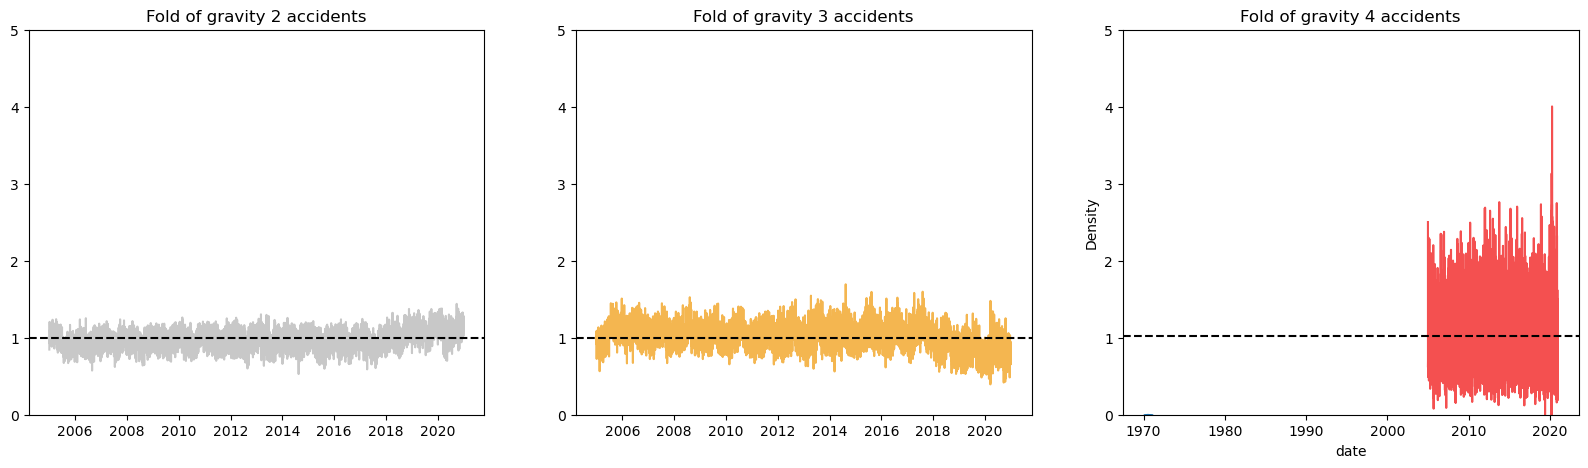

In [12]:
# Display folds by gravity
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(dfDateGravLambdaGrav2.index, dfDateGravLambdaGrav2, color='#C8C8C8')
plt.axhline(y=np.mean(dfDateGravLambdaGrav2), color='k', linestyle='--')
plt.title('Fold of gravity 2 accidents')
plt.ylim([0, 5]);
plt.subplot(132)
plt.plot(dfDateGravLambdaGrav3.index, dfDateGravLambdaGrav3, color='#F4B650')
plt.axhline(y=dfDateGravLambdaGrav3.mean(), color='k', linestyle='--')
plt.title('Fold of gravity 3 accidents')
plt.ylim([0, 5]);
plt.subplot(133)
plt.plot(dfDateGravLambdaGrav4.index, dfDateGravLambdaGrav4, color='#F45050')
plt.axhline(y=dfDateGravLambdaGrav4.mean(), color='k', linestyle='--')
plt.title('Fold of gravity 4 accidents')
plt.ylim([0, 5])

# There is a clear time-related event impacting gravity 4 accidents
varDate = dfCarac.date.value_counts().sort_index()
sns.kdeplot(varDate, fill=True);


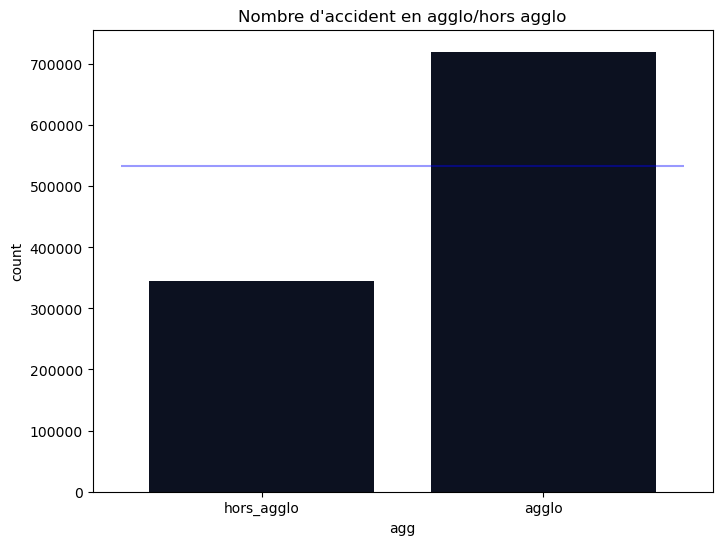

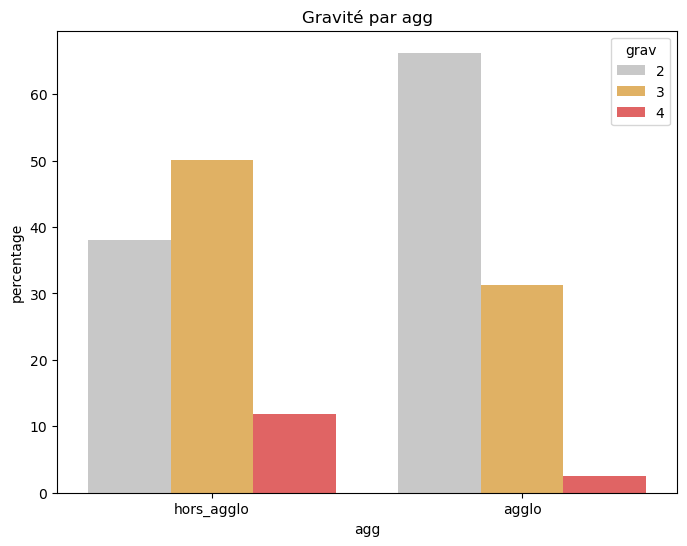

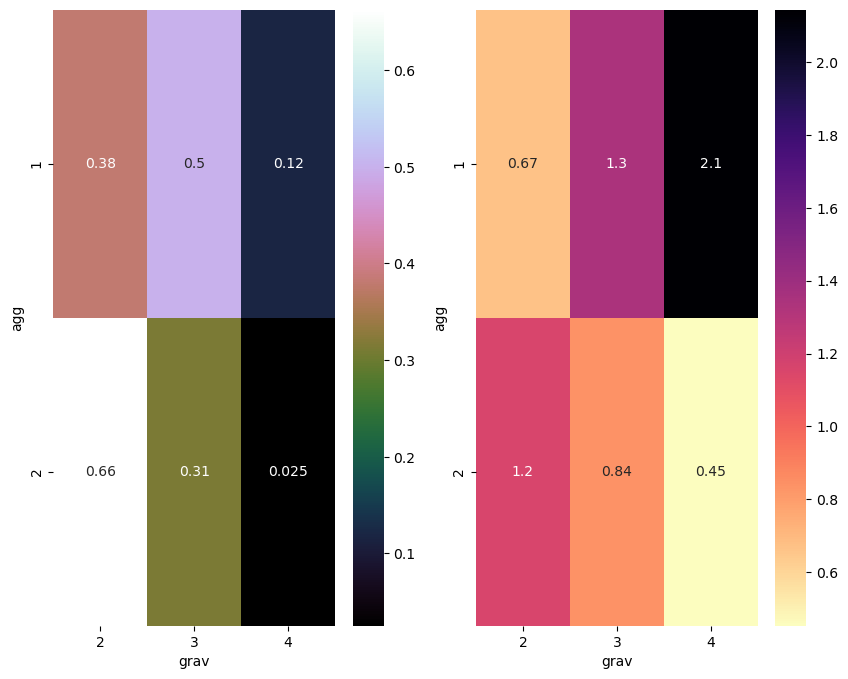

In [13]:
# Travail exploratoire agglo/hors_agglo
variable = "agg"
table = dfCarac[~dfCarac[variable].isna()]
label_xticks = ['hors_agglo', 'agglo']
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accident en agglo/hors agglo",['#090F23'],
               xticks, label_xticks)
# Many accidents when there are 2 route tracks
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# Les accidents semblent plus graves hors agglomération

heatmap_crosstable(table, variable, 'grav', "")
# 2 fois plus d'accidents de gravité 2 hors agglomération

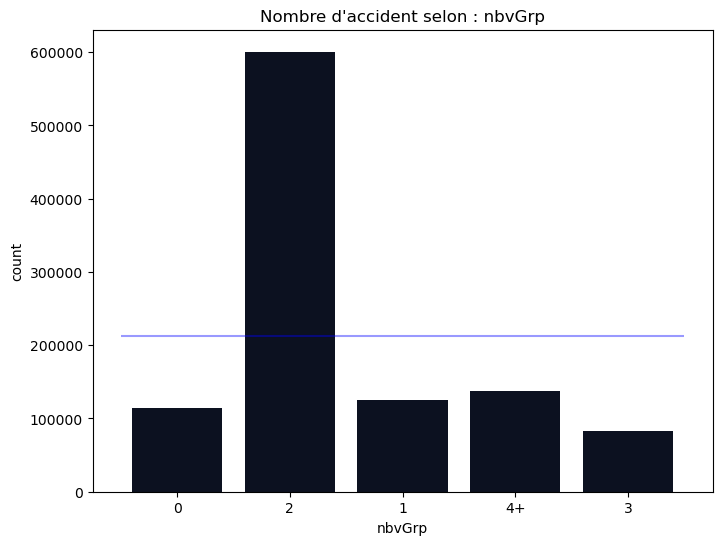

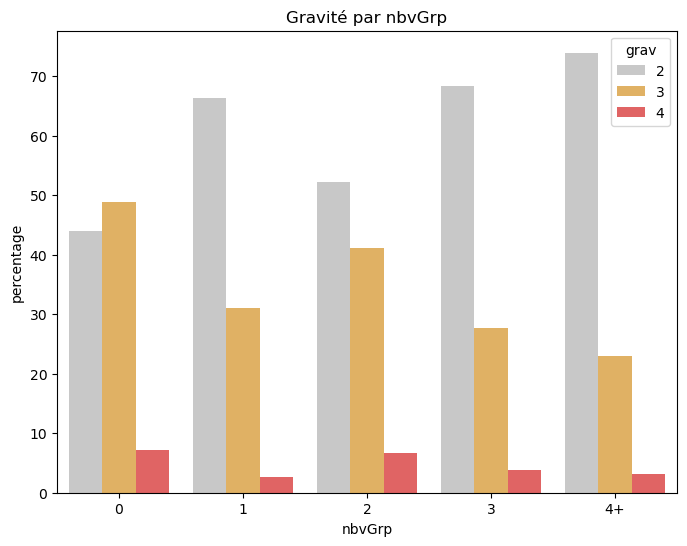

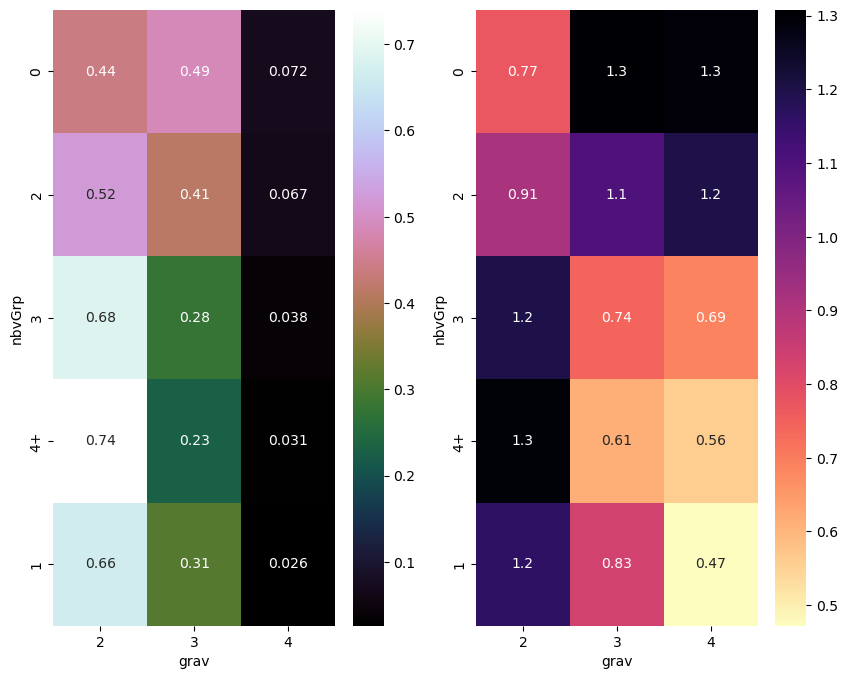

In [14]:
# Travail exploratoire nombre de voies
variable = "nbvGrp"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =[]
xticks = []

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents when there are 2 route tracks

barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# Les groupes 0 et 2 semblent avoir un taux élevé d'accidents gravité 2 et 3

heatmap_crosstable(table, variable, 'grav', "")
# Les groupes 0 et 2 semblent avoir un taux élevé d'accidents gravité 2 et 3

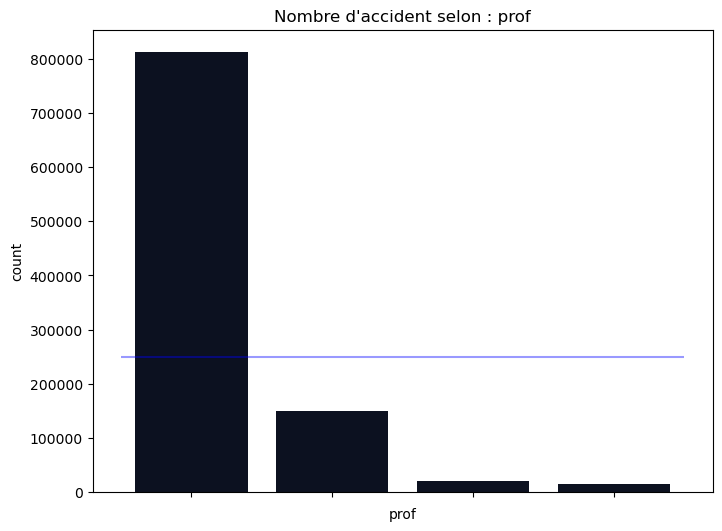

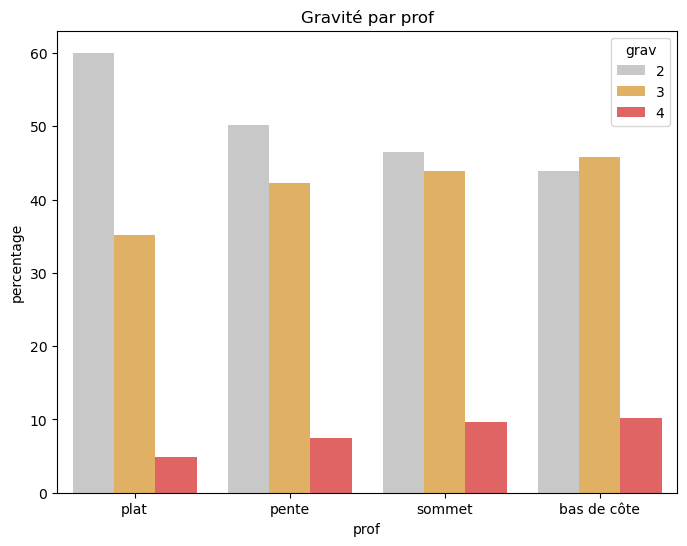

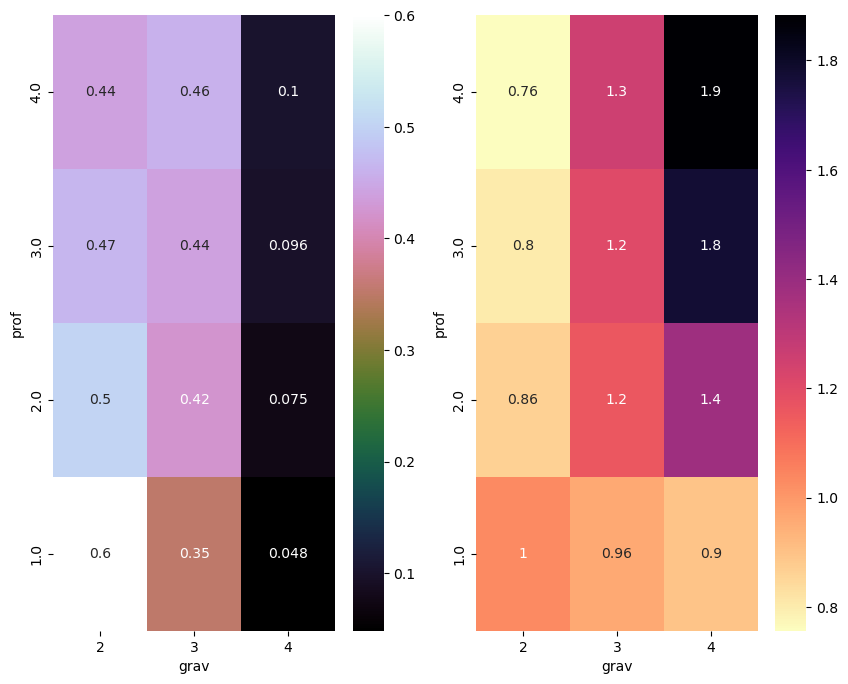

In [15]:
# Travail exploratoire selon le profil 
variable = "prof"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =["plat", "pente", "sommet", "bas de côte" ]
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents when there is a dish track

barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# RAS
heatmap_crosstable(table, variable, 'grav', "")
# RAS

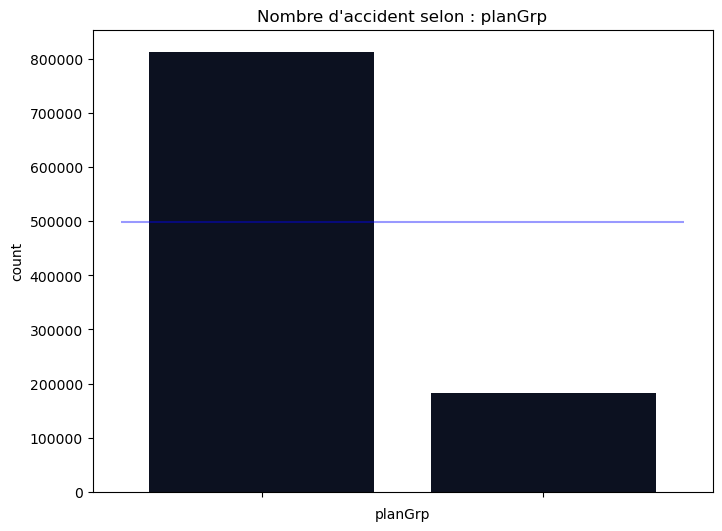

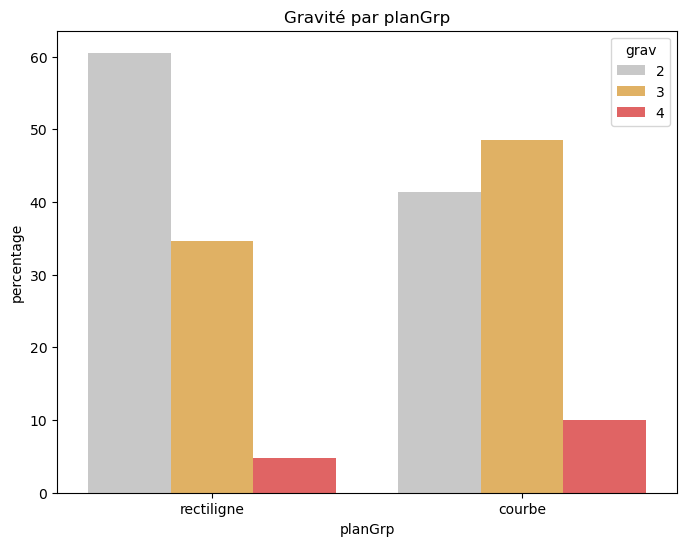

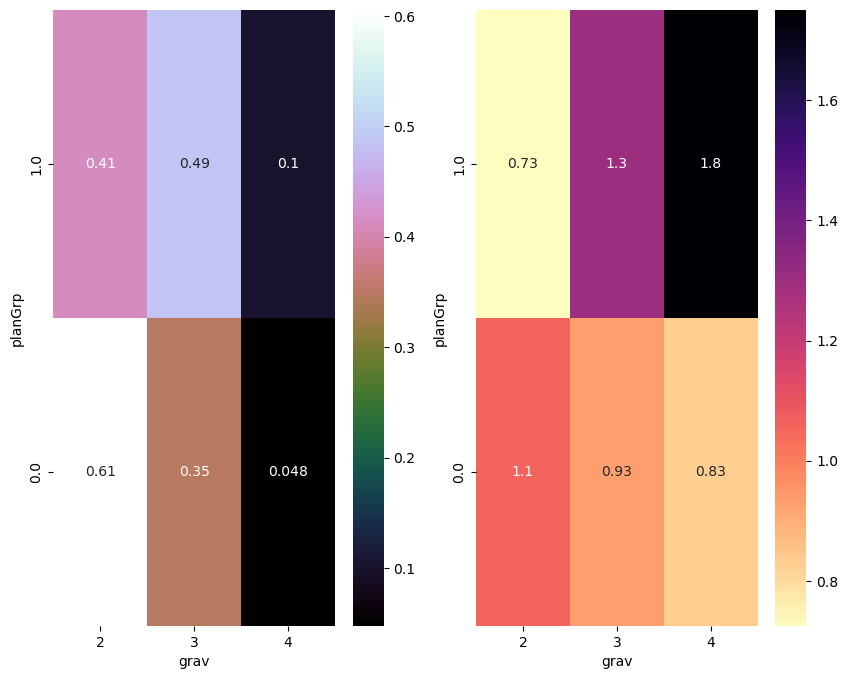

In [16]:
# Travail exploratoire selon le plan 
variable = "planGrp"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =["rectiligne", "courbe" ]
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents when there are straight part
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# Les accidents semblent plus graves en courbe
heatmap_crosstable(table, variable, 'grav', "")

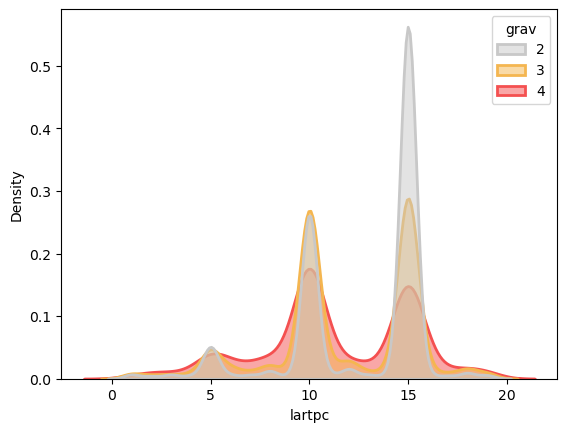

In [17]:
# Travail exploratoire selon la largeur du terre-plein central si présent
kdeplot_variable(table, 'lartpc', 'grav', 0, 20, "", ['#C8C8C8','#F4B650','#F45050'])
# There are mainly 0 values and values around a mean of 5m but values around 15, 10 and 5 (mean of 1 when outliers removed)

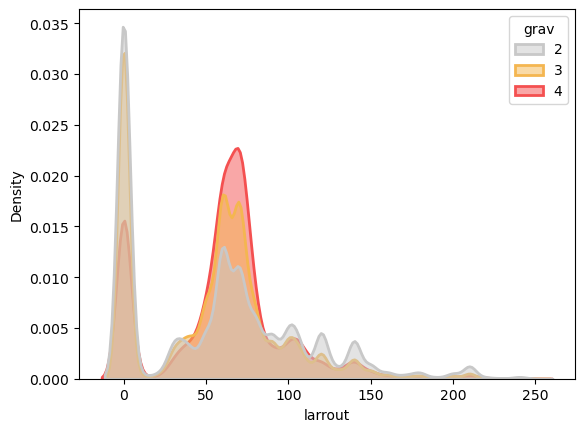

In [18]:
# Travail exploratoire selon la largeur de la route
kdeplot_variable(table, 'larrout', 'grav', -1, 250, "", ['#C8C8C8','#F4B650','#F45050'])
# It seems that most values are 0 and a mean around 58m (54m without outliers)

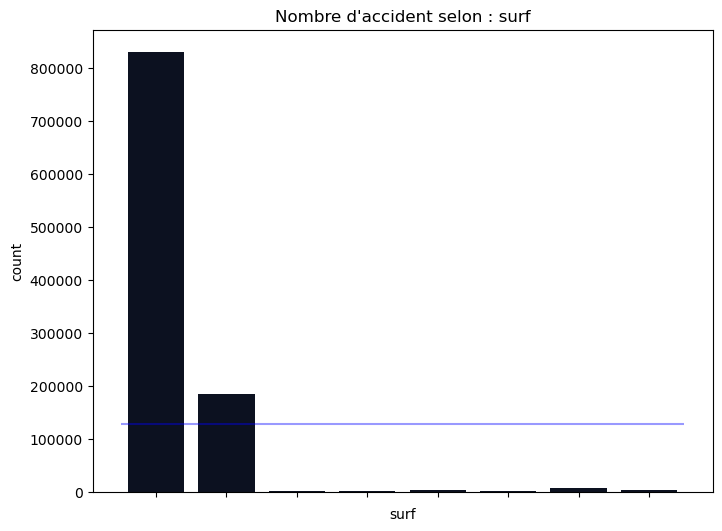

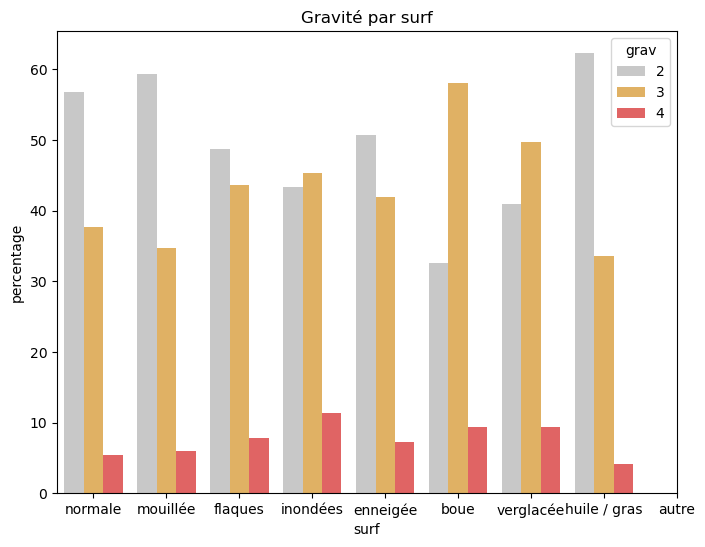

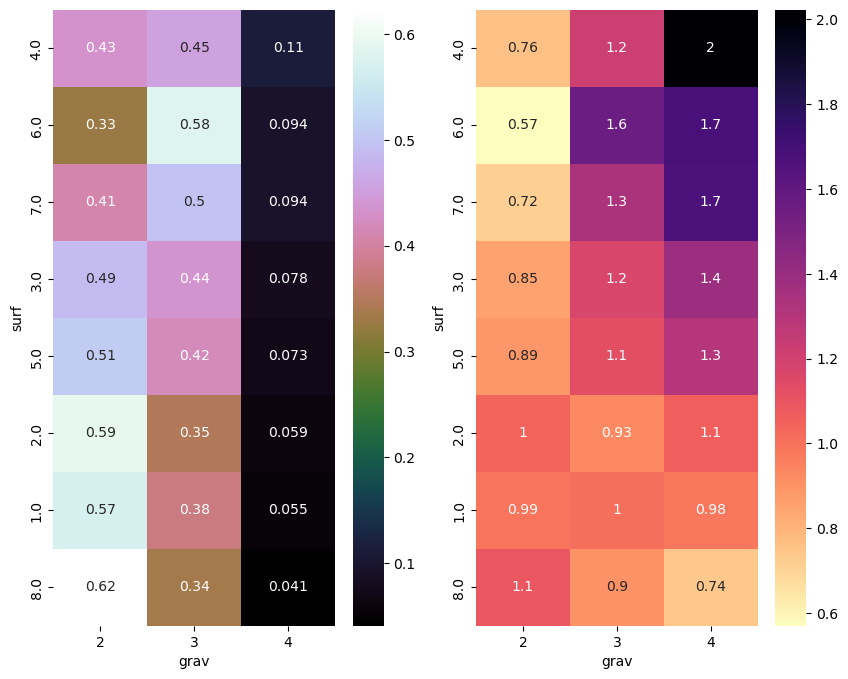

In [19]:
# Travail exploratoire selon la surface 
variable = "surf"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =["normale", "mouillée", "flaques", 'inondées', "enneigée", "boue", "verglacée", "huile / gras", "autre" ]
xticks = np.arange(0,len(label_xticks),1)

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents when there is normal or wet meteo
barplot_variable(table, variable, 'grav', "Gravité par " + variable,xticks,label_xticks)
# RAS
heatmap_crosstable(table, variable, 'grav', "")

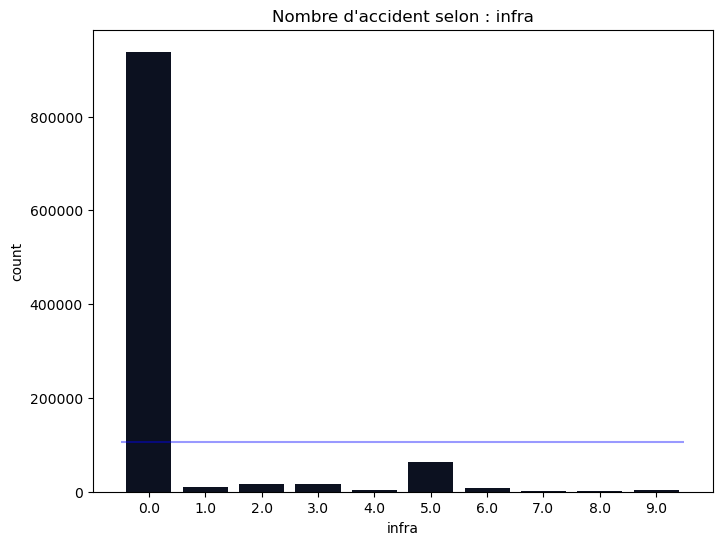

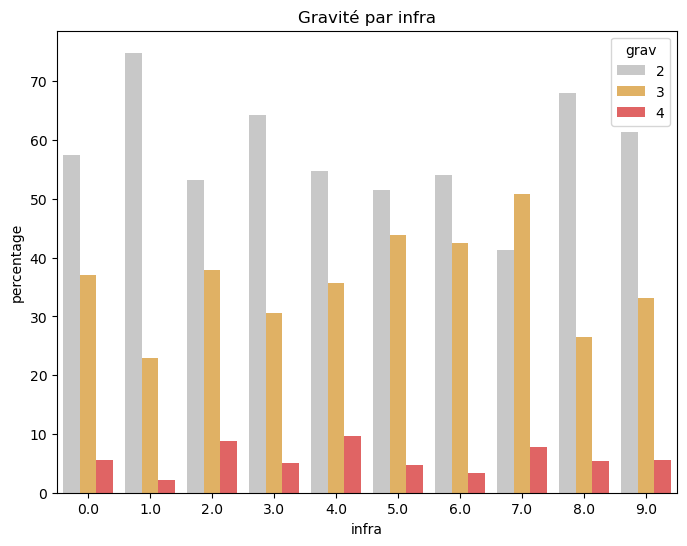

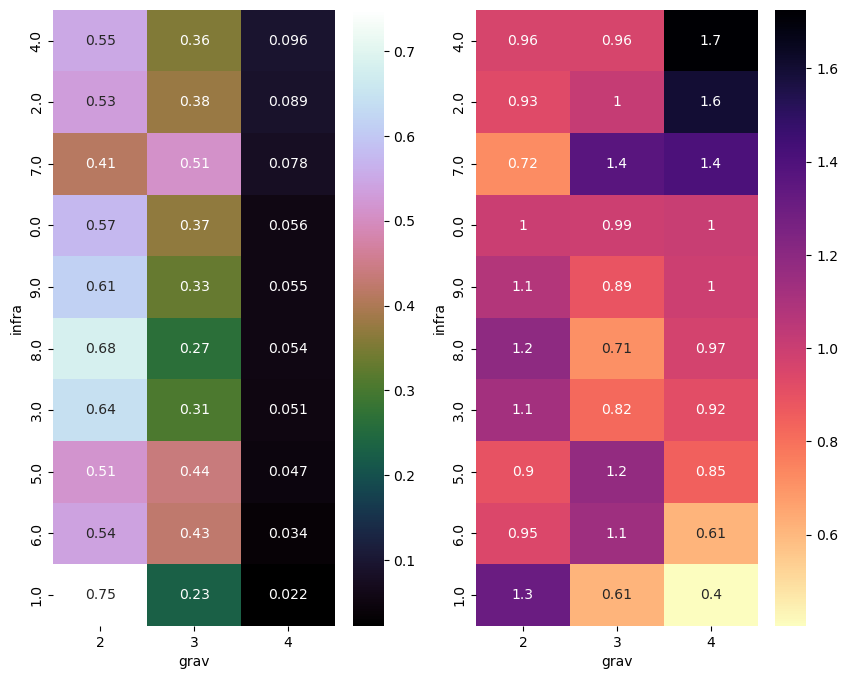

In [20]:
# Travail exploratoire selon l'infra 
variable = "infra"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =[]
xticks = []

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents when there are no additional infrastructures
barplot_variable(table, variable, 'grav', "Gravité par " + variable)
heatmap_crosstable(table, variable, 'grav', "")

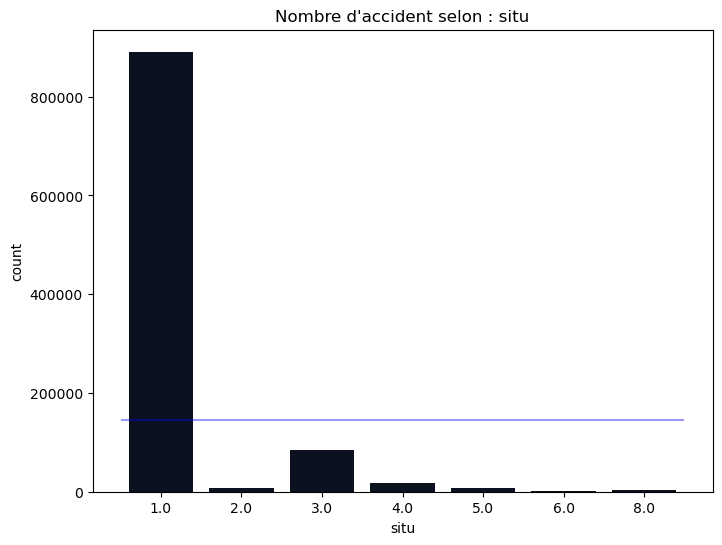

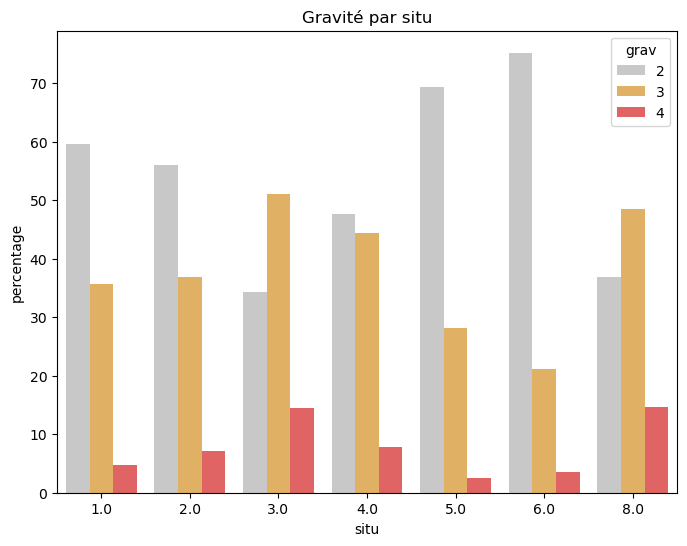

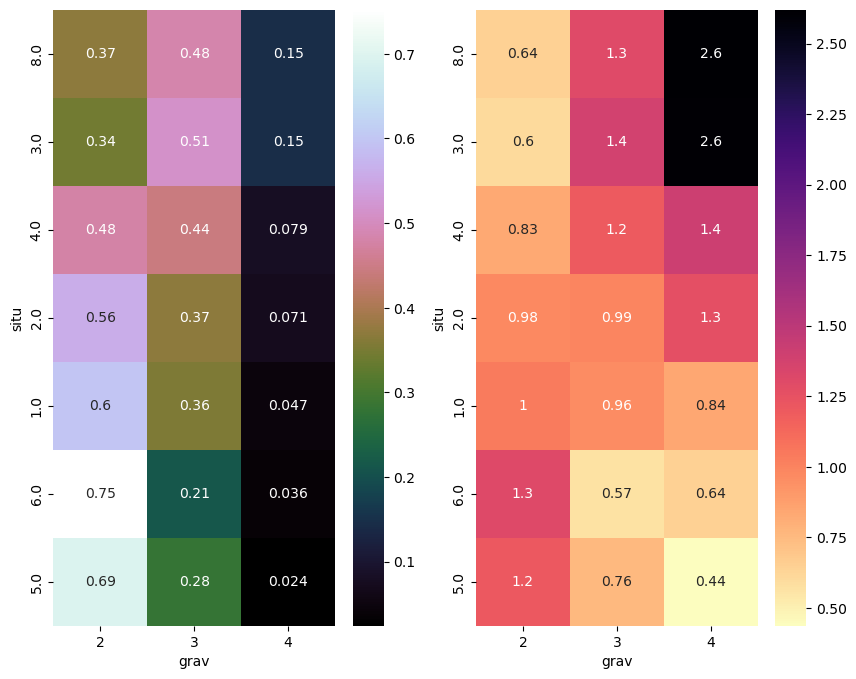

In [21]:
# Travail exploratoire selon la situation de l'accident 
variable = "situ"
table = dfLieux[~dfLieux[variable].isna()]
label_xticks =["chaussee", "accotement", "trottoir", "piste cyclabe", "voie spéciale", 'autres' ]
xticks = []

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Many accidents happen on the road
barplot_variable(table, variable, 'grav', "Gravité par " + variable)
heatmap_crosstable(table, variable, 'grav', "")

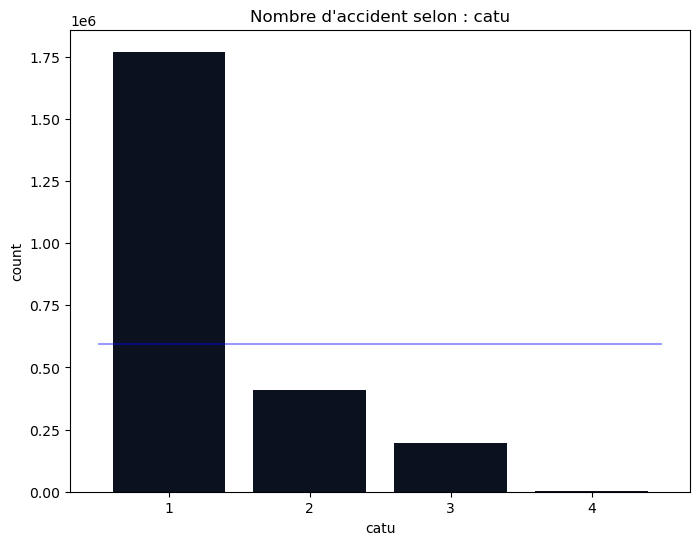

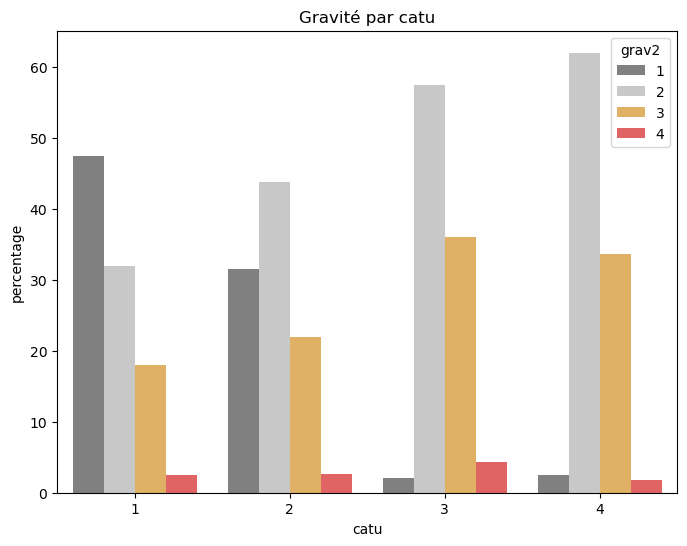

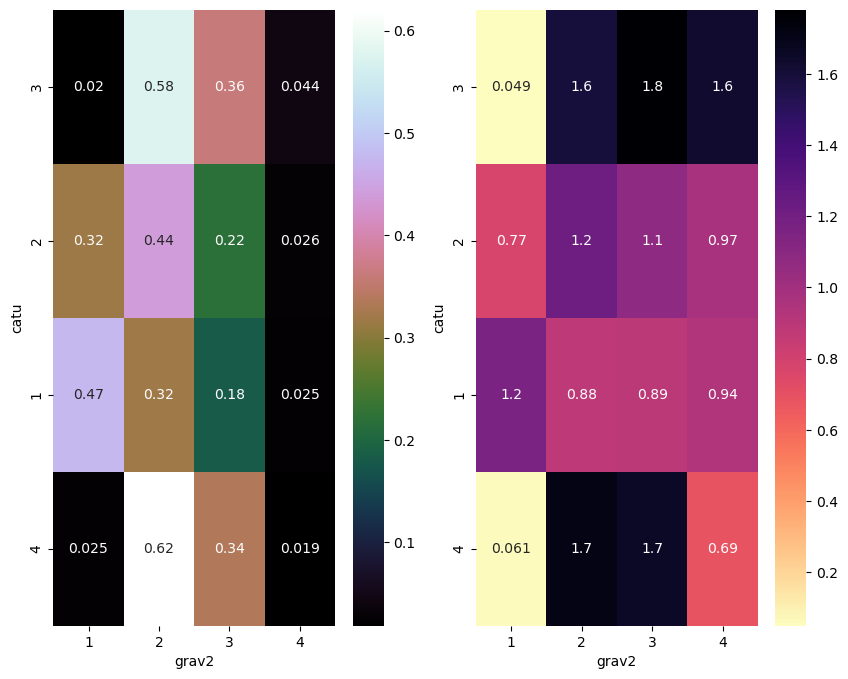

In [22]:
# Travail exploratoire selon la catégorie d'Usagers
variable = "catu"
table = dfUsagers[~dfUsagers[variable].isna()]
label_xticks =["conducteur", "passager", "piéton"]
xticks = []

countplot_base(table, variable, "Nombre d'accident selon : " + variable,['#090F23'],
               xticks)
# Beaucoup d'accidents avec des conducteurs
barplot_variable(table, variable, 'grav2', "Gravité par " + variable, table_usager=1)
# Les piétons semblent avoir plus d'hospitalisations
# Les piétons pedestres semblent avoir plus d'accidents de gravité 4
heatmap_crosstable(table, variable, 'grav2', "")

Text(0.5, 1.0, "Nombre d'accidents selon la catégorie de la route et la notion agglo / hors agglo")

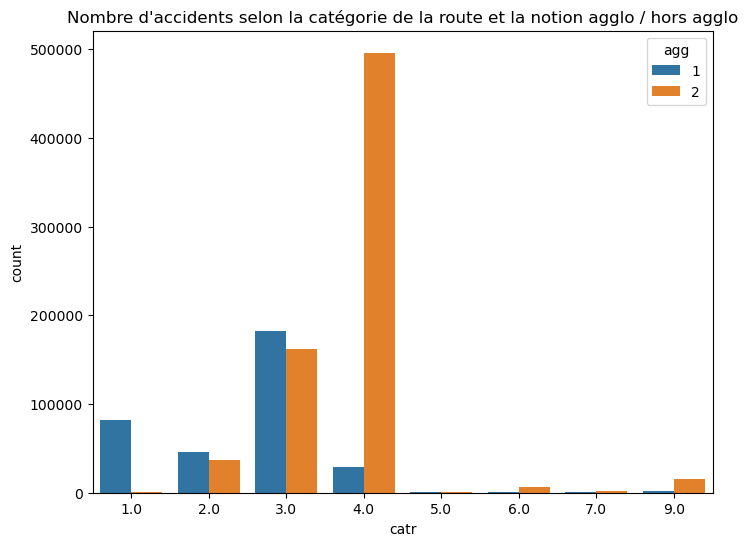

In [25]:
# On croise les informations issues des variables agg et catr
dfLieux = dfLieux.assign(agg = dfCarac["agg"])

# En agglomération
plt.figure(figsize=(8,6))
sns.countplot(x = "catr", data = dfLieux, hue = "agg");
plt.title("Nombre d'accidents selon la catégorie de la route et la notion agglo / hors agglo")
# La catégorisation 4 comprend donc majoritairement les routes dans les agglomérations 


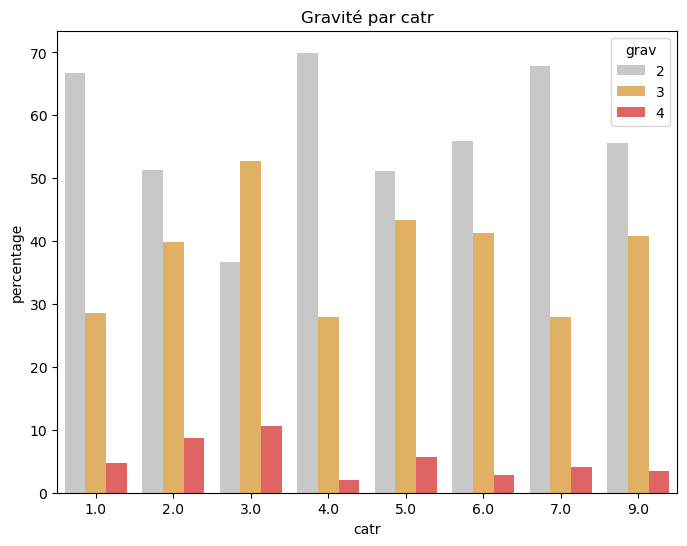

In [40]:
# Travail exploratoire selon la catégorie de route
variable = "catr"
table = dfLieux[~dfLieux[variable].isna()]


barplot_variable(table, variable, 'grav', "Gravité par " + variable, table_usager=0)
# Les accidents les plus graves se retrouvent dans les routes départementales et nationales 


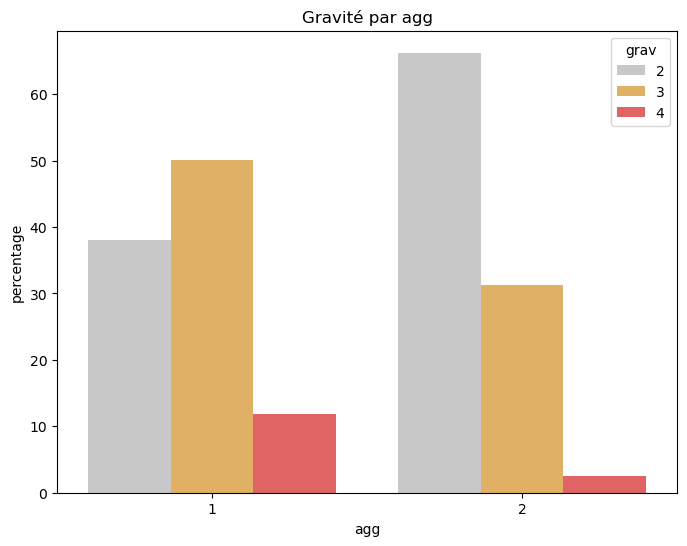

In [41]:
# Travail exploratoire selon l'agglomération / hors agglomération
variable = "agg"
table = dfLieux[~dfLieux[variable].isna()]


barplot_variable(table, variable, 'grav', "Gravité par " + variable, table_usager=0)
# Les accidents les plus graves se retrouvent dans les routes départementales et nationales 


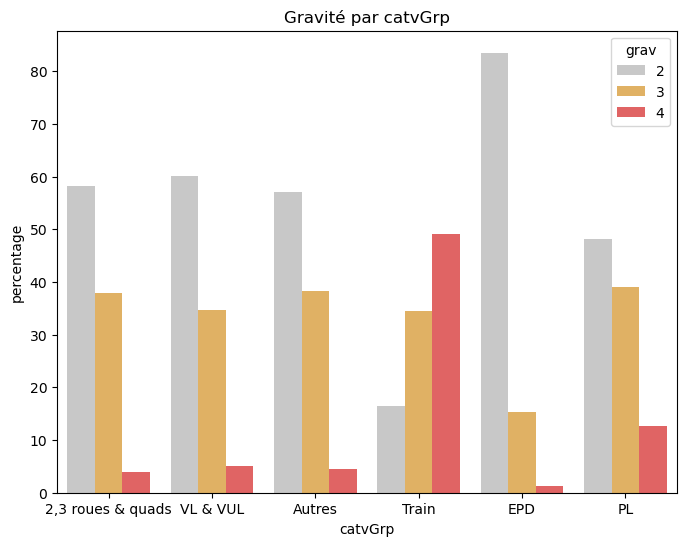

In [27]:
# Travail exploratoire selon la catégorie de véhicule
variable = "catvGrp"
table = dfVehicules[~dfVehicules[variable].isna()]
label_xticks =["2 roues et quads", "VL & VUL", "Autres", "Tram", "Train", "Indeterminé", "PL"]
xticks = np.arange(1, len(label_xticks),1)

barplot_variable(table, variable, 'grav', "Gravité par " + variable, table_usager=0)
# Les trains et poids lourds génèrent les accidents les plus grave (taille + vitesse ?))

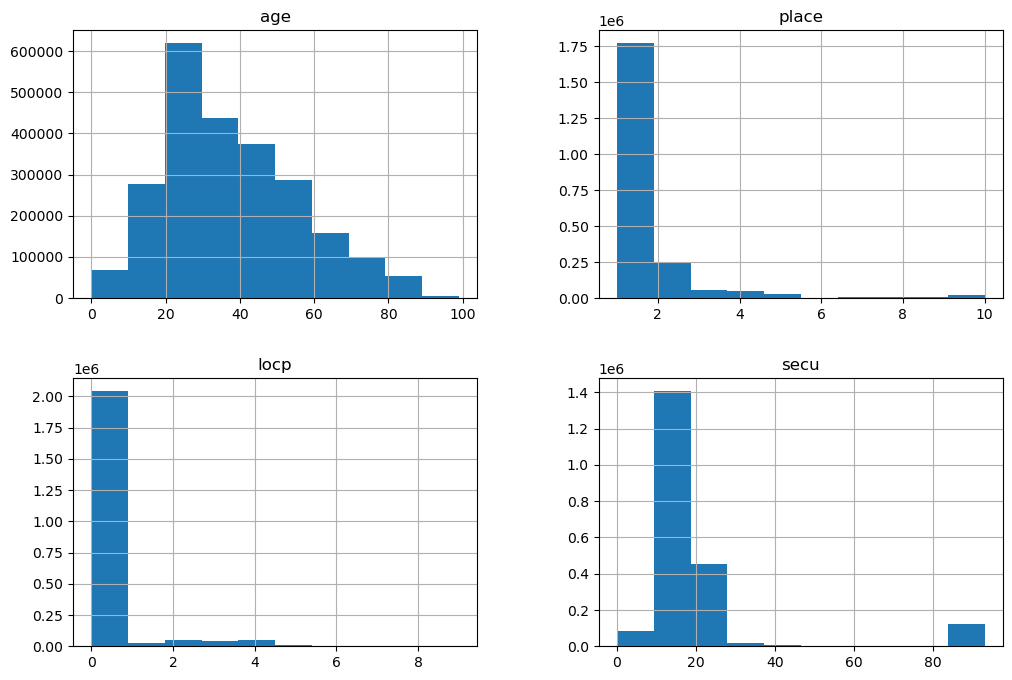

In [28]:
# Travail sur la table Usagers et la distribution des variables explicatives
dfUsagers[['age','place','actp','locp','secu']].hist(figsize=(12, 8));

C:\Users\benpa\AppData\Local\Temp\ipykernel_34716\334368315.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



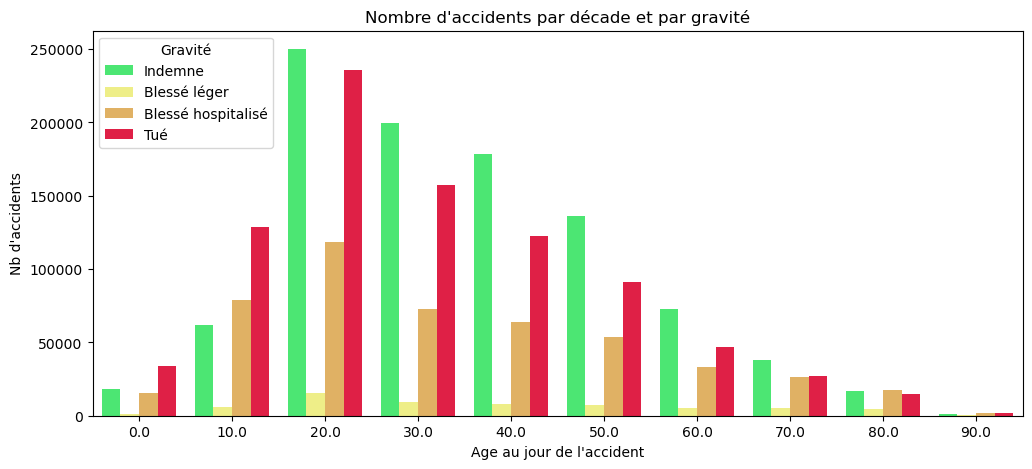

In [29]:
# Etude de la gravité des accidents selon la dizaine et la gravité des accidents

df=dfUsagers[['Num_Acc','age','grav']]
df['decade']=10*dfUsagers['age'].floordiv(10)

plt.figure(figsize=(12,5))
ax=sns.countplot(x='decade',data=df,palette=['#33FF66','#FFFF77','#F4B650','#FF0033'],hue='grav')
ax.set_xlabel("Age au jour de l'accident", fontsize = 10)
ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par décade et par gravité");

ax.legend(title='Gravité', loc='upper left', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé','Tué']);

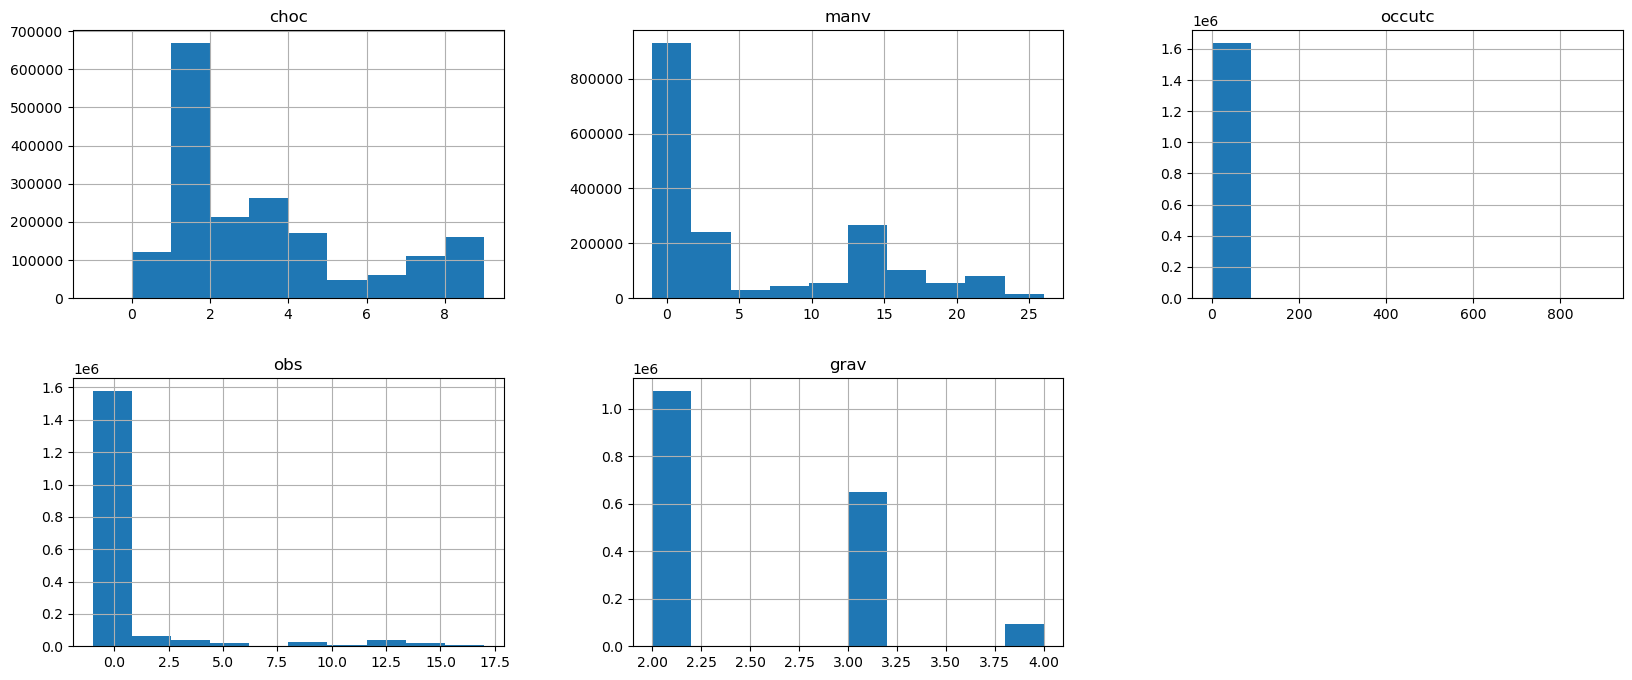

In [30]:
# Travaux sur la table Véhicules et les variables choc / manoeuvre et obstacles
dfVehicules[['choc','manv','occutc','obs','grav']].hist(figsize=(20, 8), layout=(2, 3));

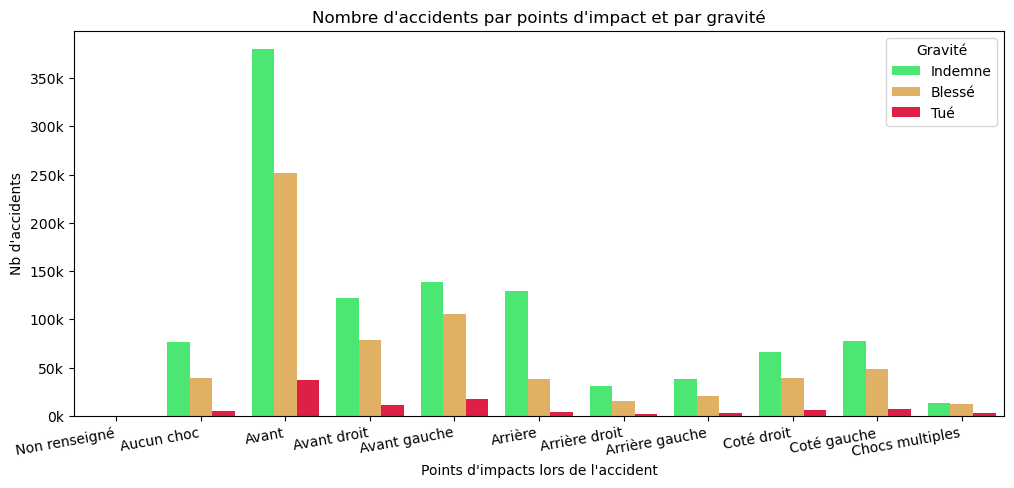

In [31]:
#nbre d'accidents par point d'impact et par gravité
df_choc=dfVehicules[['Num_Acc','choc','grav']]
xticks_labels = ['Non renseigné','Aucun choc','Avant','Avant droit','Avant gauche','Arrière',
                'Arrière droit','Arrière gauche','Coté droit','Coté gauche','Chocs multiples']
plt.figure(figsize=(12,5))
ax=sns.countplot(x='choc',data=df_choc,palette=['#33FF66','#F4B650','#FF0033'],hue='grav')
ax.set_xlabel("Points d'impacts lors de l'accident", fontsize = 10)
ax.set_xticklabels(xticks_labels, rotation=10, ha="right")

ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par points d'impact et par gravité");

ax.legend(title='Gravité', loc='upper right', labels=['Indemne','Blessé', 'Tué']);

# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y/10000)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}k'.format(y/1000)))

1    0.41
2    0.36
3    0.20
4    0.03
Name: grav2, dtype: float64
2    0.57
3    0.37
4    0.06
Name: grav, dtype: float64


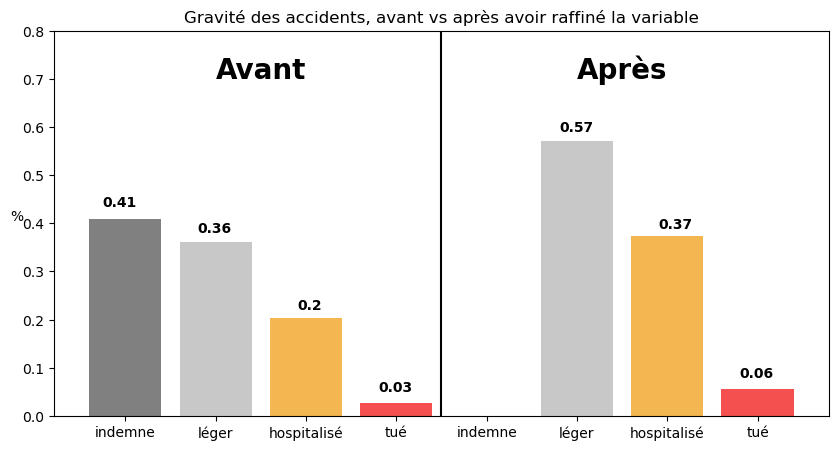

In [32]:
# Proportions
propUsagersGrav = round(dfUsagers.grav2.value_counts(normalize=True), 2)
propCaracGrav = round(dfCarac.grav.value_counts(normalize=True), 2)
print(propUsagersGrav)
print(propCaracGrav)

# Display plot
plt.figure(figsize=(10, 5))
    # plot
plt.bar([1, 2, 3, 4], dfUsagers.grav2.value_counts(normalize=True), label='Exemple 1', color=['grey', '#C8C8C8', '#F4B650', '#F45050'])
plt.bar([6, 7, 8], dfCarac.grav.value_counts(normalize=True), label='Exemple 2', color=['#C8C8C8', '#F4B650', '#F45050'])
plt.plot([4.5, 4.5], [0, 0.8], color='k')
    # text around the plot
plt.ylim([0, 0.8])
plt.xticks(ticks=np.arange(1, 9, 1), labels=['indemne', 'léger', 'hospitalisé', 'tué', 'indemne', 'léger', 'hospitalisé', 'tué'])
plt.title('Gravité des accidents, avant vs après avoir raffiné la variable')
plt.ylabel('%', rotation=0)
    # text inside the plot
plt.text(2, 0.7, 'Avant', weight='bold', fontsize=20)
plt.text(6, 0.7, 'Après', weight='bold', fontsize=20)
plt.text(0.75, propUsagersGrav.loc[1]+0.025, propUsagersGrav.loc[1], weight='bold')
for i in np.arange(2, 5):
    plt.text([1.8, 2.9, 3.8][i-2], propUsagersGrav.loc[i]+0.02, propUsagersGrav.loc[i], weight='bold')
    plt.text([5.8, 6.9, 7.8][i-2], propCaracGrav.loc[i]+0.02, propCaracGrav.loc[i], weight='bold');

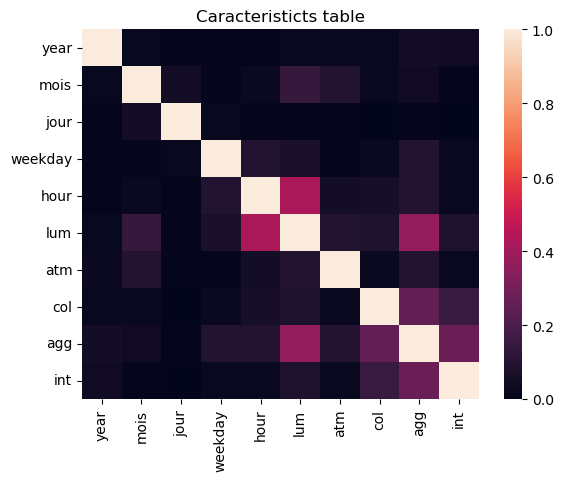

In [33]:
# On affiche les V de Cramer pour la table Carac

varList = ['year', 'mois', 'jour', 'weekday', 'hour', 'lum', 'atm', 'col', 'agg', 'int']
vCramer_table(dfCarac, varList, 'Caracteristicts table')


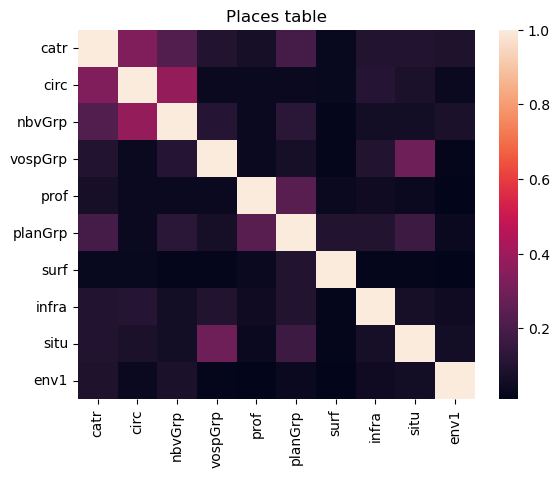

In [34]:
# On affiche les V de Cramer pour la table Lieux

varList = ['catr', 'circ', 'nbvGrp', 'vospGrp', 'prof', 'planGrp', 'surf', 'infra', 'situ', 'env1']
vCramer_table(dfLieux, varList, 'Places table')


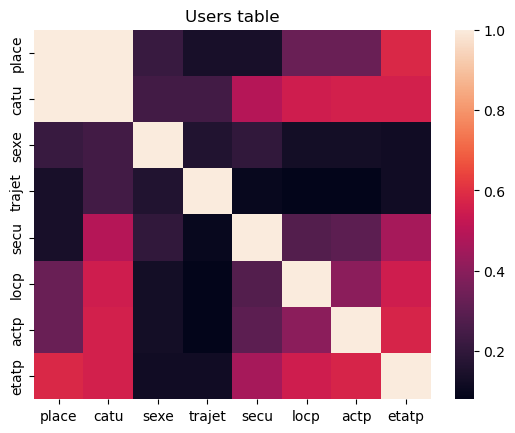

In [35]:
# On affiche les V de Cramer pour la table Usagers

varList = ['place', 'catu', 'sexe', 'trajet', 'secu', 'locp', 'actp', 'etatp']
vCramer_table(dfUsagers, varList, 'Users table')


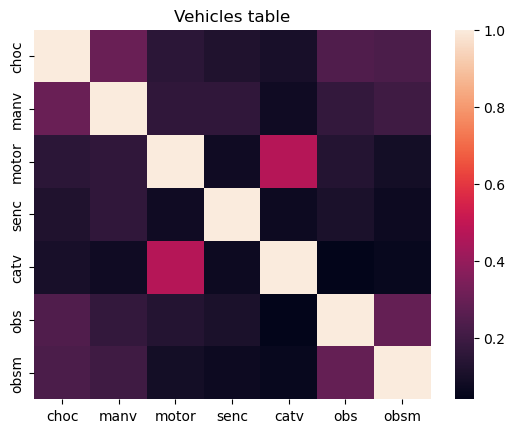

In [36]:
# On affiche les V de Cramer pour la table Véhicules

varList = ['choc', 'manv', 'motor', 'senc', 'catv', 'obs', 'obsm']
vCramer_table(dfVehicules, varList, 'Vehicles table')


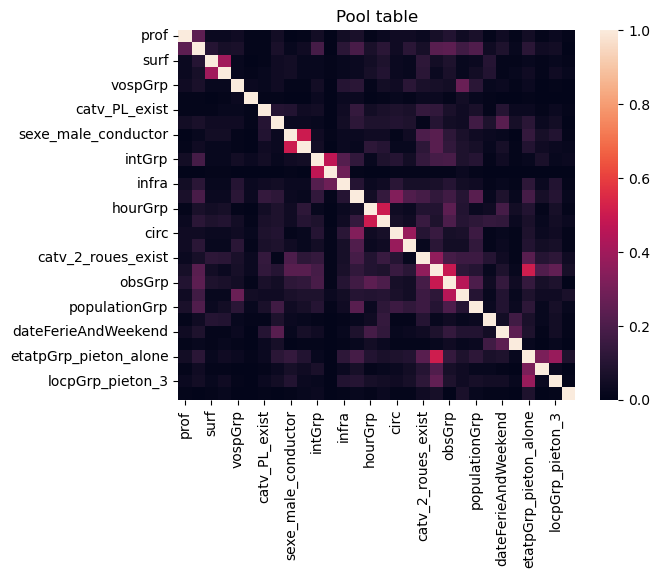

In [37]:
# On affiche les V de Cramer pour la table Pool

varList = ['prof', 'planGrp', 'surf', 'atm', 
                'vospGrp', 
                'catv_EPD_exist', 'catv_PL_exist', 
                'trajet_coursesPromenade_conductor',
                'sexe_male_conductor', 'sexe_female_conductor', 
                'intGrp', 'catv_train_exist', 'infra', 'catr', 'hourGrp', 'lum', 'circ', 'nbvGrp', 
                'catv_2_roues_exist', 'col', 'obsGrp', 'situ', 'populationGrp', 
                'mois_label', 'dateFerieAndWeekend', 'dateFerie',
                'etatpGrp_pieton_alone', 'locpGrp_pieton_1', 'locpGrp_pieton_3', 'locpGrp_pieton_6'
                ]
vCramer_table(dfPool, varList, 'Pool table')